# Project Name: Integrated Retail Analytics for Store Optimization

## Project Summary: Integrated Retail Analytics for Store Optimization and Demand Forecasting

This project utilizes machine learning and data analysis to optimize retail store performance, forecast demand, and enhance customer strategies.

---

### 1. Project Objective

The core objective is to optimize store performance, forecast demand, and enhance customer experience through segmentation and personalized marketing strategies. Key components include:

- **Anomaly Detection**: Identifying unusual sales patterns.
- **Data Preprocessing & Feature Engineering**: Handling missing data and creating new influential features.
- **Customer Segmentation**: Grouping stores/departments based on sales patterns.
- **Market Basket Analysis**: Inferring product associations for cross-selling.
- **Demand Forecasting**: Predicting weekly sales incorporating internal and external factors.
- **Strategic Recommendations**: Translating insights into actionable plans for inventory, marketing, and store optimization.

---

### 2. Dataset Overview

The project integrates three datasets for a holistic view:

- **`sales data-set.csv`**: Contains `Weekly_Sales` figures for `Store` and `Date`, along with `IsHoliday` flag. This is the primary source for sales trends and forecasting.
- **`Features data set.csv`**: Provides contextual information like `Temperature`, `Fuel_Price`, `CPI`, `Unemployment`, and `MarkDown1` to `MarkDown5`. These capture environmental and promotional influences.
- **`stores data-set.csv`**: Contains static store attributes like `Type` (e.g., A, B, C) and `Size`, crucial for understanding store characteristics and segmentation.

---

### 3. Feature-wise Explanations and Relevance

Upon merging, the comprehensive feature set will be utilized as follows:

- **Store**: Unique identifier for each retail outlet, enabling store-specific analysis and segmentation.
- **Date**: Timestamp for each record, fundamental for time-series analysis, trend identification, and deriving features like `Year`, `Month`, `WeekOfYear`, `DayOfWeek`, etc.
- **Weekly_Sales**: The primary target variable for demand forecasting and key metric for anomaly detection.
- **IsHoliday**: Binary flag indicating holiday weeks, which significantly impact sales and require special consideration in models.
- **Temperature**: External factor influencing consumer behavior and sales, especially for seasonal products.
- **Fuel_Price**: Economic indicator affecting consumer spending and supply chain costs.
- **CPI (Consumer Price Index)**: Measure of inflation and purchasing power, reflecting broader economic conditions.
- **Unemployment**: Economic indicator reflecting consumer confidence and spending.
- **MarkDown1 to MarkDown5**: Promotional markdown values, critical for understanding pricing strategy impact. Handling missing values in these is a key challenge.
- **Type (of Store)**: Categorical classification of stores, vital for segmentation and understanding varying operational models.
- **Size (of Store)**: Physical area of the store, correlating with inventory capacity and sales potential.

These features, through careful cleaning, engineering, and analysis, will drive accurate forecasts, actionable optimization strategies, and a deep understanding of retail performance.

---

### 4. Use Cases
**Detecting Sales Anomalies**: Quickly identifying unusual sales patterns for investigation.

**Forecasting Demand**: Accurately predicting weekly sales to optimize inventory and operations.

**Segmenting Stores**: Grouping stores for tailored marketing and resource allocation.

**Revealing Product Associations**: Enhancing cross-selling and store layouts.


## GitHub Link
https://github.com/Raghuram94-msd/Integrated_Retail_Analytics_for_Store_Optimization

## Problem Statement

In the highly competitive retail landscape, optimizing store performance and accurately forecasting demand are critical challenges. Businesses struggle with inefficient inventory management, generic marketing strategies, and reactive responses to sales fluctuations. Without a proactive approach to understanding sales patterns, customer behavior, and the impact of external factors, retailers risk lost sales, excess inventory costs, and diminished customer satisfaction.

This project addresses these challenges by aiming to:
* **Proactively identify and address unusual sales patterns (anomalies)** across various stores and departments, considering external influences like holidays or economic indicators.
* **Improve demand forecasting accuracy** for weekly sales by integrating comprehensive data, including economic indicators (CPI, unemployment, fuel prices) and store-specific attributes.
* **Enhance customer experience and marketing effectiveness** through advanced customer segmentation, enabling personalized strategies based on sales patterns and regional factors.
* **Formulate data-driven strategies** for inventory management and store optimization, moving beyond traditional methods to leverage machine learning insights for real-world application.

By tackling these issues, the project seeks to provide a robust analytical framework that enables retailers to make informed decisions, optimize operations, and gain a significant competitive advantage.



## 1. Data Loading and Understanding

**Supress Warnings**

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

### Import Libraries

In [2]:
# Core Data Manipulation and Analysis
import pandas as pd # For data loading, manipulation, and analysis
import numpy as np  # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations
import seaborn as sns           # For creating informative and attractive statistical graphics

# Machine Learning - Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder # For feature scaling and encoding
from sklearn.impute import SimpleImputer # For basic missing value imputation
from sklearn.compose import ColumnTransformer # For applying different transformers to different columns
from sklearn.pipeline import Pipeline # For chaining multiple processing steps

# Machine Learning - Model Selection and Evaluation
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV # For splitting data, time-series validation, and hyperparameter tuning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # For regression evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score # For clustering evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix # For classification/anomaly detection evaluation

# Machine Learning - Anomaly Detection
from sklearn.ensemble import IsolationForest # For detecting anomalies in sales data
from sklearn.svm import OneClassSVM # Another option for anomaly detection

# Machine Learning - Clustering (for Customer Segmentation)
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN # For various clustering algorithms

# Machine Learning - Demand Forecasting Models
from statsmodels.tsa.seasonal import STL # For time-series decomposition (trend, seasonality, residual)
from statsmodels.tsa.arima.model import ARIMA # For ARIMA/SARIMA models
from prophet import Prophet # Facebook's forecasting tool, excellent for business time series
import xgboost as xgb # XGBoost for powerful regression (forecasting) and feature importance

### Load the Datasets

In [3]:
# Attempt to load the dataset and handle potential errors

try:
    # Load dataset from the specified URL
    features_df = pd.read_csv(r"E:\ML internship\Integrated retail analytics\Features data set.csv")
    sales_df = pd.read_csv(r"E:\ML internship\Integrated retail analytics\sales data-set.csv")
    stores_df = pd.read_csv(r"E:\ML internship\Integrated retail analytics\stores data-set.csv")
    print("Datasets loaded successfully.")
except Exception as e:
    # Print error message if loading fails
    print(f"Failed to load dataset: {e}")

Datasets loaded successfully.


### Initial Inspection

#### Datasets First View

In [4]:
features_df.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [5]:
sales_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

In [6]:
stores_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

#### Datasets Rows and Columns Count

In [7]:
# View the count of Rows and Columns of features dataset
print(f"No of rows in features dataset: {features_df.shape[0]}")
print(f"No of columns in features dataset: {features_df.shape[1]}")

No of rows in features dataset: 8190
No of columns in features dataset: 12


In [11]:
# View the count of Rows and Columns of sales dataset
print(f"No of rows in sales dataset: {sales_df.shape[0]}")
print(f"No of columns in sales dataset: {sales_df.shape[1]}")

No of rows in sales dataset: 421570
No of columns in sales dataset: 5


In [12]:
# View the count of Rows and Columns of stores dataset
print(f"No of rows in stores dataset: {stores_df.shape[0]}")
print(f"No of columns in stores dataset: {stores_df.shape[1]}")

No of rows in stores dataset: 45
No of columns in stores dataset: 3


#### Datasets Information

In [13]:
# Features Dataset Info
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [14]:
# Sales Dataset Info
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [15]:
# Stores Dataset Info
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


#### Dataset Description

In [16]:
# Features Dataset Description
features_df.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

In [17]:
# Sales Dataset Description
sales_df.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [18]:
# Stores Dataset Description
stores_df.describe()

Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000

#### Datasets Duplicates

In [19]:
# Features Dataset Duplicate Value Count
print(f" Duplicate values in features Dataset: {features_df.duplicated().sum()}")

# Sales Dataset Duplicate Value Count
print(f" Duplicate values in sales Dataset: {sales_df.duplicated().sum()}")

# Stores Dataset Duplicate Value Count
print(f" Duplicate values in stores Dataset: {stores_df.duplicated().sum()}")

 Duplicate values in features Dataset: 0
 Duplicate values in sales Dataset: 0
 Duplicate values in stores Dataset: 0


#### Missing values

In [20]:
# Features Dataset Missing Values/Null Values Count
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [21]:
# Sales Dataset Missing Values/Null Values Count
sales_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [22]:
# Stores Dataset Missing Values/Null Values Count
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

#### Visualize Missing value counts

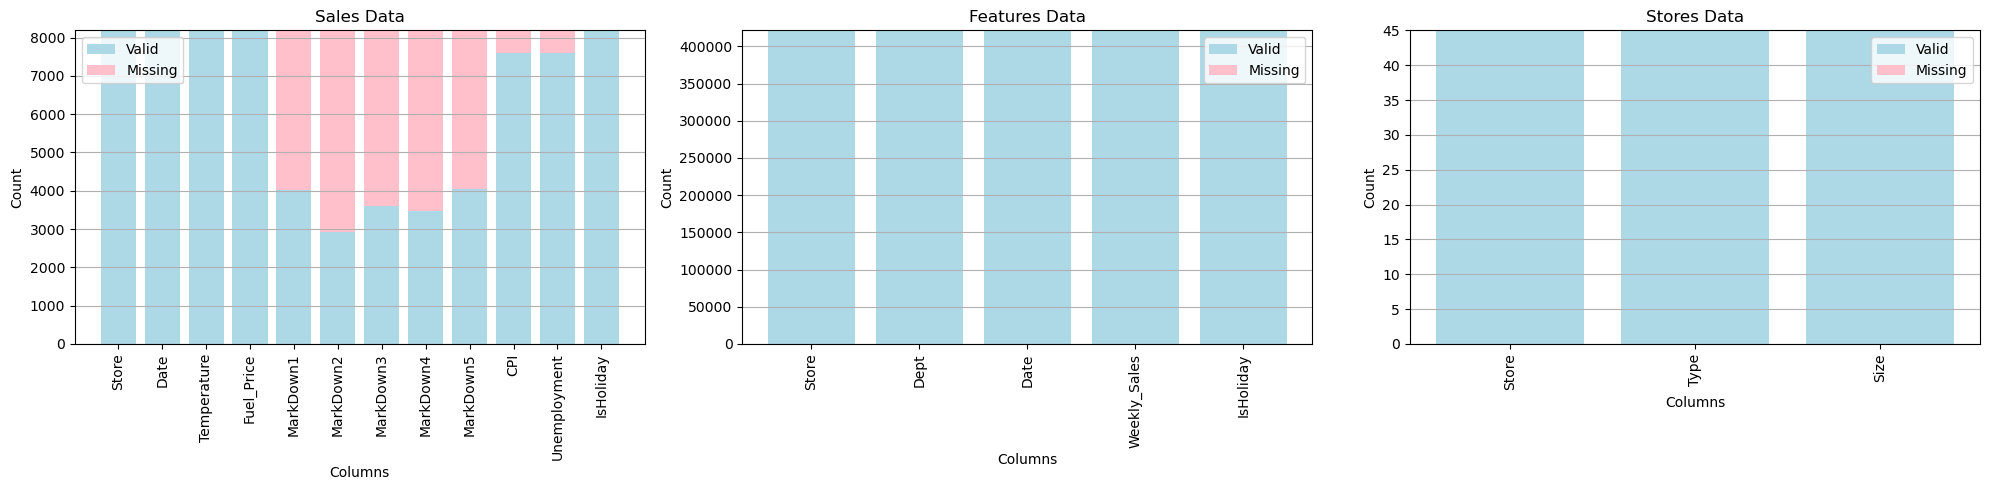

In [8]:
# Function to plot missing vs. valid values
def plot_missing_valid(df, title, ax):
    total_counts = len(df)
    missing_counts = df.isnull().sum()
    valid_counts = total_counts - missing_counts

    ax.bar(missing_counts.index, valid_counts, label='Valid', color='lightblue')
    ax.bar(missing_counts.index, missing_counts, bottom=valid_counts, label='Missing', color='pink')

    ax.set_title(title)
    ax.set_xlabel('Columns')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)
    ax.grid(axis='y')
    ax.legend()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot for each dataset
plot_missing_valid(features_df, 'Sales Data', axes[0])
plot_missing_valid(sales_df, 'Features Data', axes[1])
plot_missing_valid(stores_df, 'Stores Data', axes[2])

plt.tight_layout()
plt.show()


The visualization highlights missing and valid data across three datasets. In the Sales Data, significant missing values are present in the `MarkDown1` to `MarkDown5` columns, which may impact analysis and require imputation strategies. In contrast, both the Features Data and Stores Data display complete datasets with no missing values.

#### Datasets Columns

In [23]:
# Columns in Features dataset
features_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [24]:
# Columns in Sales dataset
sales_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [26]:
# Columns in Stores dataset
stores_df.columns

Index(['Store', 'Type', 'Size'], dtype='object')

#### Check for Unique values for each variable

In [27]:
# Features Dataset - Unique variables for each variable
features_df.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

In [28]:
# Sales Dataset - Unique variables for each variable
sales_df.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [29]:
# Stores Dataset - Unique variables for each variable
stores_df.nunique()

Store    45
Type      3
Size     40
dtype: int64

**Brief Summary of Data Loading and Initial Understanding**

The initial data loading and understanding phase is complete, providing a foundational view of our three datasets: **sales_df**, **features_df**, and **stores_df**.

**Key Observations**:

- All datasets loaded successfully.

- **sales_df**: Contains `Weekly_Sales` (**target variable**) and `Date` (needs datetime conversion).

- **features_df**: Includes `Temperature`, `Fuel_Price`, `CPI`, `Unemployment`, and `MarkDown1-5` which have significant missing values (**NaN**s). `Date` also needs conversion.

- **stores_df**: Contains `Type` and `Size`, appearing clean.

## 2. Data Cleaning and Preprocessing

### Merge datasets

**Merge Strategy**:

1. **First Merge**: Combine `sales` and `stores` datasets using the common column `Store` to enrich sales data with store characteristics.

2. **Second Merge**: Merge the result with the `features` dataset using both `Store` and `Date` columns, aligning sales records with the corresponding temporal features and environmental conditions.

In [9]:
# Step 1: Merge sales with stores on 'Store'
sales_stores_df = pd.merge(sales_df, stores_df, on='Store', how='left')

# Step 2: Merge the result with features on 'Store' and 'Date'
df = pd.merge(sales_stores_df, features_df, on=['Store', 'Date'], how='left')

# Show the shape and first few rows of the final merged dataset
print("Final Merged Dataset Shape:", df.shape)
df.head()

Final Merged Dataset Shape: (421570, 17)


Store  Dept        Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1  05/02/2010      24924.50        False    A  151315   
1      1     1  12/02/2010      46039.49         True    A  151315   
2      1     1  19/02/2010      41595.55        False    A  151315   
3      1     1  26/02/2010      19403.54        False    A  151315   
4      1     1  05/03/2010      21827.90        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        NaN        NaN        NaN        NaN   
1        38.51       2.548        NaN        NaN        NaN        NaN   
2        39.93       2.514        NaN        NaN        NaN        NaN   
3        46.63       2.561        NaN        NaN        NaN        NaN   
4        46.50       2.625        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        NaN  211.096358         8.106        False  
1        NaN  211.242170         8.106         True  
2        NaN  211.289143         8.106        False  
3        NaN  211.319643         8.106        False  
4        NaN  211.350143         8.106        False

we have 2 `IsHoliday` columns which are the result of merge. lets check if both the columns are equivalent or not. If yes, lets drop one of them and name it `IsHoliday`

In [10]:
# Keep just one IsHoliday column
if df['IsHoliday_x'].equals(df['IsHoliday_y']):
    df['IsHoliday'] = df['IsHoliday_x']
    df.drop(columns=['IsHoliday_x', 'IsHoliday_y'], inplace=True)
else:
    print("Warning: 'IsHoliday_x' and 'IsHoliday_y' are not identical.")

In [11]:
df.shape

(421570, 16)

In [12]:
# Check for Duplicates in df that might have arised after merging the datasets
print(df.duplicated().sum())

0


### Data Type Conversion

#### Check for the Datatypes in the DataFrame

In [8]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object


#### Convert the `Date` and `Type` columns

In [13]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Convert Type column to category
df['Type'] = df['Type'].astype('category')
df['Store'] = df['Store'].astype('category')
df['Dept'] = df['Dept'].astype('category')

### Handling the Missing Values`



#### Check for the Missing Values

In [14]:
# Calculate the total number of missing values in each column
missing_count = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display missing counts and percentages side by side
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percent
})

# Print the resulting DataFrame
print(missing_df)

              Missing Count  Missing Percentage
Store                     0            0.000000
Dept                      0            0.000000
Date                      0            0.000000
Weekly_Sales              0            0.000000
Type                      0            0.000000
Size                      0            0.000000
Temperature               0            0.000000
Fuel_Price                0            0.000000
MarkDown1            270889           64.257181
MarkDown2            310322           73.611025
MarkDown3            284479           67.480845
MarkDown4            286603           67.984676
MarkDown5            270138           64.079038
CPI                       0            0.000000
Unemployment              0            0.000000
IsHoliday                 0            0.000000


The MarkDown columns contain around 65% missing values. Since these columns represent discounts or price reductions, it is reasonable to assume that missing values indicate no markdown applied. Therefore, we will fill all NaN values in these columns with 0 to reflect this assumption.


In [16]:
cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']  # markdown columns
df[cols] = df[cols].fillna(0)  # fill NaNs with 0 in these columns


To handle missing values in the `MarkDown1` to `MarkDown5` columns, we filled all `NaN`s with zeros, assuming missing means no markdown activity.










### Outlier Handling

**Know the numerical columns from the DataFrame**

In [17]:
df.select_dtypes(include=['int64', 'float64']).columns.tolist()                                                                                       

['Weekly_Sales',
 'Size',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

**Manually select the Numerical columns**

In [18]:
num_cols = [
    'Size', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
    'MarkDown1', 'MarkDown2', 'MarkDown3',
    'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'
]

#### Outlier Visualization before Handling

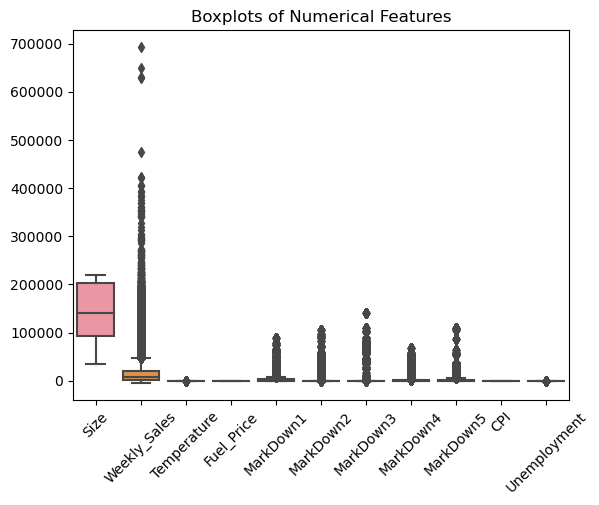

In [19]:
# Boxplot for selected numeric columns
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

- **Weekly_Sales** and **MarkDown1–5** show many outliers, indicating skewed distributions with extreme values.  
- **Size**, **Fuel_Price**, **CPI**, and **Unemployment** have relatively stable distributions with fewer outliers.  
- **Temperature** shows some outliers but is mostly consistent.

These insights suggest the need for outlier handling or scaling before modeling.


#### Outlier Handling

In [20]:
# This function caps outliers in specified numerical columns of a DataFrame based on given lower and upper percentile thresholds.

def cap_outliers_multiple_cols(df, num_cols, lower_pct=0.01, upper_pct=0.99):
    for col in num_cols:
        if df[col].dtype in ['float64', 'int64']:
            # Calculate the lower and upper bounds using quantiles
            lower_bound = df[col].quantile(lower_pct)
            upper_bound = df[col].quantile(upper_pct)
            # Cap the values outside the bounds to the calculated limits
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Usage:
df = cap_outliers_multiple_cols(df, num_cols)

#### Outlier Visualization after Handling

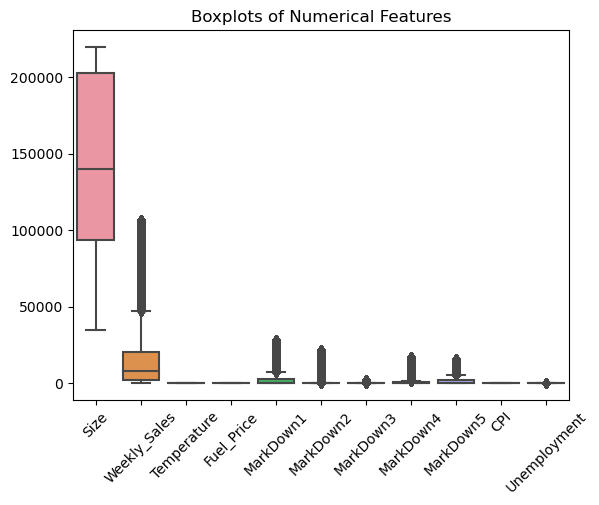

In [21]:
# Boxplot to confirm the Outlier capping
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

After applying outlier capping using the 1st and 99th percentile thresholds, we observe a significant improvement in the distribution of numerical features:

- Extreme outliers have been **limited** without removing any data points, preserving the dataset size.
- The **boxplots are more compact**, and the whiskers now reflect a more accurate spread of the core data.
- Features like `Weekly_Sales`, `MarkDown1`, and `MarkDown2` show a **reduction in extreme skewness**, helping to stabilize statistical analysis and improve model performance.

### Filtering Sales Data by Valid Stores


In [22]:
valid_stores = stores_df['Store'].unique()
sales_df[sales_df['Store'].isin(valid_stores)]

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  05/02/2010      24924.50      False
1           1     1  12/02/2010      46039.49       True
2           1     1  19/02/2010      41595.55      False
3           1     1  26/02/2010      19403.54      False
4           1     1  05/03/2010      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  28/09/2012        508.37      False
421566     45    98  05/10/2012        628.10      False
421567     45    98  12/10/2012       1061.02      False
421568     45    98  19/10/2012        760.01      False
421569     45    98  26/10/2012       1076.80      False

[421570 rows x 5 columns]

## 3. Anamoly Detection

In [23]:
# Convert the 'Date' column to the day name (e.g., Monday, Tuesday) and count occurrences
df['Date'].dt.day_name().value_counts()

Friday    421570
Name: Date, dtype: int64

The data shows that most entries, totaling 421,570, occur on **Fridays**. This suggests a focus on Friday activities, possibly for weekly sales trends.


In [24]:
# Extract unique combinations of 'Store' and 'Dept' from the dataset
unique_combinations = df[['Store', 'Dept']].drop_duplicates()

In [25]:
df

Store Dept       Date  Weekly_Sales Type    Size  Temperature  \
0          1    1 2010-02-05      24924.50    A  151315        42.31   
1          1    1 2010-02-12      46039.49    A  151315        38.51   
2          1    1 2010-02-19      41595.55    A  151315        39.93   
3          1    1 2010-02-26      19403.54    A  151315        46.63   
4          1    1 2010-03-05      21827.90    A  151315        46.50   
...      ...  ...        ...           ...  ...     ...          ...   
421565    45   98 2012-09-28        508.37    B  118221        64.88   
421566    45   98 2012-10-05        628.10    B  118221        64.89   
421567    45   98 2012-10-12       1061.02    B  118221        54.47   
421568    45   98 2012-10-19        760.01    B  118221        56.47   
421569    45   98 2012-10-26       1076.80    B  118221        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572       0.00       0.00       0.00       0.00       0.00   
1            2.565       0.00       0.00       0.00       0.00       0.00   
2            2.565       0.00       0.00       0.00       0.00       0.00   
3            2.565       0.00       0.00       0.00       0.00       0.00   
4            2.625       0.00       0.00       0.00       0.00       0.00   
...            ...        ...        ...        ...        ...        ...   
421565       3.997    4556.61      20.64       1.50    1601.01    3288.25   
421566       3.985    5046.74       0.00      18.82    2253.43    2340.01   
421567       4.000    1956.28       0.00       7.89     599.32    3990.54   
421568       3.969    2004.02       0.00       3.18     437.73    1537.49   
421569       3.882    4018.91      58.08     100.00     211.94     858.33   

               CPI  Unemployment  IsHoliday  
0       211.096358         8.106      False  
1       211.242170         8.106       True  
2       211.289143         8.106      False  
3       211.319643         8.106      False  
4       211.350143         8.106      False  
...            ...           ...        ...  
421565  192.013558         8.684      False  
421566  192.170412         8.667      False  
421567  192.327265         8.667      False  
421568  192.330854         8.667      False  
421569  192.308899         8.667      False  

[421570 rows x 16 columns]

### STL Decomposition

STL (Seasonal-Trend Decomposition using Loess) is a powerful technique in time series analysis that breaks down a series into three key components:

1. **Seasonal**: This component captures recurring patterns or cycles within a fixed period, such as weekly or monthly trends.

2. **Trend**: The trend component identifies the long-term movement in the data by smoothing out short-term fluctuations and highlighting the underlying trajectory.

3. **Residual**: After removing the seasonal and trend effects, the residual component represents irregular variations or noise.

STL is known for its flexibility and robustness, effectively adapting to shifts in data patterns and being resistant to outliers. These features make it ideal for applications like anomaly detection and complex seasonal pattern analysis.

In [26]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import STL

stl_results = []

# Check how many rows per group
group_sizes = df.groupby(['Store', 'Dept']).size()

for (store, dept), group in tqdm(df.groupby(['Store', 'Dept'])):
    group = group.sort_values('Date')
    group.set_index('Date', inplace=True)

    # Preserve original index and fillna before interpolation
    original_index = group.index

    # Check: do we have at least 13 weeks of data?
    if len(group) < 13:
        group['anomaly_stl'] = False
    else:
        # Interpolate Weekly_Sales if needed
        group['Weekly_Sales'] = group['Weekly_Sales'].interpolate()

        try:
            # STL decomposition
            stl = STL(group['Weekly_Sales'], seasonal=13, robust=True)
            result = stl.fit()
            residual_z = (result.resid - result.resid.mean()) / result.resid.std()
            group['anomaly_stl'] = np.abs(residual_z) > 3
        except Exception:
            group['anomaly_stl'] = False

    # Reset index to get Date back as a column
    group = group.reindex(original_index)  # Ensure all original rows are included
    group.reset_index(inplace=True)
    group['Store'] = store
    group['Dept'] = dept

    # Append processed group
    stl_results.append(group)

# Concatenate all results ensuring all groups are included
df = pd.concat(stl_results, ignore_index=True)

# Verify the result
print("STL anomalies detected:", df['anomaly_stl'].sum())

100%|██████████████████████████████████████████████████████████████████████████████| 3331/3331 [03:08<00:00, 17.69it/s]


STL anomalies detected: 11357


The analysis identified **11,357 anomalies** using STL decomposition. These anomalies are data points with residuals significantly deviating from the norm, indicating irregular patterns or outliers in the time series data.


In [28]:
df.shape

(421570, 17)

### SPC (Statistical Process Control)

Statistical Process Control (SPC) is a method used to monitor and control processes through statistical techniques. It helps ensure that a process operates efficiently and produces products within desired quality standards.

**Key Features of SPC**:

- **Control Limits**: SPC uses control limits, typically set at ±3 standard deviations from the process mean, to detect anomalies.
- **Consistency Monitoring**: By analyzing variations, SPC distinguishes between common cause variation (natural) and special cause variation (signals of issues).
- **Proactive Management**: Identifying trends or shifts enables timely interventions to maintain process stability and quality.

In the context of time series, SPC helps identify deviations in sales patterns, indicating potential issues that require further investigation.

In [29]:
spc_results = []

for (store, dept), group in tqdm(df.groupby(['Store', 'Dept'])):
    # Sort and maintain the original index
    group = group.sort_values('Date').set_index('Date')

    if group.shape[0] < 10:
        group['anomaly_spc'] = False
    else:
        # Interpolate and calculate SPC limits
        group['Weekly_Sales'] = group['Weekly_Sales'].interpolate()
        mean = group['Weekly_Sales'].mean()
        std = group['Weekly_Sales'].std()
        upper = mean + 3 * std
        lower = mean - 3 * std
        group['anomaly_spc'] = (group['Weekly_Sales'] > upper) | (group['Weekly_Sales'] < lower)

    # Reset index to bring Date back as a column
    group.reset_index(inplace=True)
    group['Store'] = store
    group['Dept'] = dept
    spc_results.append(group)

# Concatenate results
df = pd.concat(spc_results, ignore_index=True)

print("SPC anomalies detected:", df['anomaly_spc'].sum())

100%|█████████████████████████████████████████████████████████████████████████████| 3331/3331 [00:08<00:00, 405.84it/s]


SPC anomalies detected: 5994


The SPC analysis identified **5,994 anomalies**. These anomalies signify sales data points that fall outside of the control limits, set as ±3 standard deviations from the mean.


### Isolation Forest

Isolation Forest detects anomalies by isolating observations through random splits. Outliers are quickly isolated with fewer splits. It is efficient and suitable for large datasets with no assumptions about data distribution. In this analysis, it helps identify anomalies in sales data, enhancing data quality and insights.

In [30]:
iso_results = []

# Store the original row count for later verification
original_row_count = df.shape[0]

for (store, dept), group in tqdm(df.groupby(['Store', 'Dept'])):
    # Sort and set the index for the group
    group.sort_values('Date', inplace=True)
    group.set_index('Date', inplace=True)

    # Re-interpolate to fill gaps without `asfreq`
    group['Weekly_Sales'] = group['Weekly_Sales'].interpolate(method='linear', limit_direction='both')

    for feature in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
        group[feature] = group[feature].interpolate(method='linear', limit_direction='both')
        group[feature] = group[feature].fillna(method='ffill').fillna(method='bfill')

    # Extract model features
    features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
    model_input = group[features]

    if model_input.isna().any().any():
        model_input.fillna(model_input.mean(), inplace=True)

    # Fit model if there are enough rows
    if model_input.shape[0] >= 10:
        iso_model = IsolationForest(n_estimators=50, contamination=0.05, n_jobs=-1, random_state=42)
        preds = iso_model.fit_predict(model_input)
        anomaly_flags = pd.Series(False, index=group.index)
        anomaly_flags.loc[model_input.index] = preds == -1
        group['anomaly_iso'] = anomaly_flags
    else:
        group['anomaly_iso'] = False

    group.reset_index(inplace=True)
    group['Store'] = store
    group['Dept'] = dept
    iso_results.append(group)

# Combine all results back together
df = pd.concat(iso_results, ignore_index=True)

# Print summary
final_row_count = df.shape[0]
print(f"Original rows: {original_row_count}, Final rows: {final_row_count}")
print("Isolation Forest anomalies detected:", df['anomaly_iso'].sum())

100%|██████████████████████████████████████████████████████████████████████████████| 3331/3331 [06:48<00:00,  8.15it/s]


Original rows: 421570, Final rows: 421570
Isolation Forest anomalies detected: 23507


Detected 23,507 anomalies by isolating observations through random feature splits, offering the most comprehensive anomaly detection.

In [31]:
df.shape

(421570, 19)

In [32]:
df

Date  Store  Dept  Weekly_Sales Type    Size  Temperature  \
0      2010-02-05      1     1      24924.50    A  151315        42.31   
1      2010-02-12      1     1      46039.49    A  151315        38.51   
2      2010-02-19      1     1      41595.55    A  151315        39.93   
3      2010-02-26      1     1      19403.54    A  151315        46.63   
4      2010-03-05      1     1      21827.90    A  151315        46.50   
...           ...    ...   ...           ...  ...     ...          ...   
421565 2012-09-28     45    98        508.37    B  118221        64.88   
421566 2012-10-05     45    98        628.10    B  118221        64.89   
421567 2012-10-12     45    98       1061.02    B  118221        54.47   
421568 2012-10-19     45    98        760.01    B  118221        56.47   
421569 2012-10-26     45    98       1076.80    B  118221        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572       0.00       0.00       0.00       0.00       0.00   
1            2.565       0.00       0.00       0.00       0.00       0.00   
2            2.565       0.00       0.00       0.00       0.00       0.00   
3            2.565       0.00       0.00       0.00       0.00       0.00   
4            2.625       0.00       0.00       0.00       0.00       0.00   
...            ...        ...        ...        ...        ...        ...   
421565       3.997    4556.61      20.64       1.50    1601.01    3288.25   
421566       3.985    5046.74       0.00      18.82    2253.43    2340.01   
421567       4.000    1956.28       0.00       7.89     599.32    3990.54   
421568       3.969    2004.02       0.00       3.18     437.73    1537.49   
421569       3.882    4018.91      58.08     100.00     211.94     858.33   

               CPI  Unemployment  IsHoliday  anomaly_stl  anomaly_spc  \
0       211.096358         8.106      False        False        False   
1       211.242170         8.106       True        False        False   
2       211.289143         8.106      False        False        False   
3       211.319643         8.106      False        False        False   
4       211.350143         8.106      False        False        False   
...            ...           ...        ...          ...          ...   
421565  192.013558         8.684      False        False        False   
421566  192.170412         8.667      False        False        False   
421567  192.327265         8.667      False        False        False   
421568  192.330854         8.667      False        False        False   
421569  192.308899         8.667      False        False        False   

        anomaly_iso  
0             False  
1              True  
2              True  
3             False  
4             False  
...             ...  
421565        False  
421566        False  
421567         True  
421568        False  
421569        False  

[421570 rows x 19 columns]

In [33]:
# Merge Anomaly Results into One DataFrame
from functools import reduce

# Ensure only relevant columns and avoid duplication
stl_anomalies = df[['Store', 'Dept', 'Date', 'anomaly_stl']]
spc_anomalies = df[['Store', 'Dept', 'Date', 'anomaly_spc']]
iso_anomalies = df[['Store', 'Dept', 'Date', 'anomaly_iso']]

# Merge all results
combined_df = reduce(lambda left, right: pd.merge(left, right, on=['Store', 'Dept', 'Date'], how='outer'),
                     [stl_anomalies, spc_anomalies, iso_anomalies])

# Create consensus flag (2 or more methods agree)
combined_df['anomaly_consensus'] = combined_df[['anomaly_stl', 'anomaly_spc', 'anomaly_iso']].sum(axis=1) >= 2

# Print anomaly counts
print("\n--- Anomaly Summary ---")
print("STL anomalies:", combined_df['anomaly_stl'].sum())
print("SPC anomalies:", combined_df['anomaly_spc'].sum())
print("Isolation Forest anomalies:", combined_df['anomaly_iso'].sum())
print("Consensus anomalies (≥2 methods):", combined_df['anomaly_consensus'].sum())


--- Anomaly Summary ---
STL anomalies: 11357
SPC anomalies: 5994
Isolation Forest anomalies: 23507
Consensus anomalies (≥2 methods): 6079


This code merges anomaly detection results from STL, SPC, and Isolation Forest into a single DataFrame to identify consensus anomalies. It starts by extracting relevant columns ('Store', 'Dept', 'Date', and anomaly flags) from the main DataFrame. The `reduce` function combines these DataFrames using `pd.merge`, aligning anomalies by 'Store', 'Dept', and 'Date'. A consensus flag is computed by checking if two or more methods agree on an anomaly, using a sum of the anomaly flags. Finally, the code prints the total anomaly counts for each method and the consensus.

In [34]:
combined_df

Store  Dept       Date  anomaly_stl  anomaly_spc  anomaly_iso  \
0           1     1 2010-02-05        False        False        False   
1           1     1 2010-02-12        False        False         True   
2           1     1 2010-02-19        False        False         True   
3           1     1 2010-02-26        False        False        False   
4           1     1 2010-03-05        False        False        False   
...       ...   ...        ...          ...          ...          ...   
421565     45    98 2012-09-28        False        False        False   
421566     45    98 2012-10-05        False        False        False   
421567     45    98 2012-10-12        False        False         True   
421568     45    98 2012-10-19        False        False        False   
421569     45    98 2012-10-26        False        False        False   

        anomaly_consensus  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  
...                   ...  
421565              False  
421566              False  
421567              False  
421568              False  
421569              False  

[421570 rows x 7 columns]

In [35]:
# Investigate Causes of Consensus Anomalies
# Merge anomaly flags with original feature data
df = pd.merge(combined_df[['Store', 'Dept', 'Date', 'anomaly_consensus']],
                      df,
                      on=['Store', 'Dept', 'Date'], how='right')

# Ensure anomaly_consensus is binary (1 for anomalies, 0 for non-anomalies)
df['anomaly_consensus'] = df['anomaly_consensus'].fillna(0).astype(int)

# Verify row count and anomaly count
print("Total rows in df:", len(df))
print("Number of anomalies:", df['anomaly_consensus'].sum())

Total rows in df: 421570
Number of anomalies: 6079


This code snippet merges consensus anomaly flags back into the original data with a right join, preserving all entries. It ensures 'anomaly_consensus' is a binary flag by filling missing values with zero and converting to integers. The result shows a total of 421,570 rows, with 6,077 identified as consensus anomalies.

In [36]:
# Print all column names after the Anomaly Detection
df.columns

Index(['Store', 'Dept', 'Date', 'anomaly_consensus', 'Weekly_Sales', 'Type',
       'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'anomaly_stl', 'anomaly_spc', 'anomaly_iso'],
      dtype='object')

In [37]:
#Know the DataFrame shape after Anomaly Detection
df.shape

(421570, 20)

#### Evaluating Anomaly Detection Models Using Precision, Recall, and F1 Score

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

models = ['anomaly_stl', 'anomaly_iso', 'anomaly_spc']

for model in models:
    y_pred = df[model]
    y_true = df['anomaly_consensus']

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\nEvaluation for {model}:")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall:    {recall:.3f}")
    print(f"  F1 Score:  {f1:.3f}")



Evaluation for anomaly_stl:
  Precision: 0.072
  Recall:    0.135
  F1 Score:  0.094

Evaluation for anomaly_iso:
  Precision: 0.257
  Recall:    0.993
  F1 Score:  0.408

Evaluation for anomaly_spc:
  Precision: 0.918
  Recall:    0.905
  F1 Score:  0.911


The **SPC method** outperforms the others with a precision of 0.918, recall of 0.905, and an F1 score of 0.911, indicating it effectively balances identifying anomalies accurately and retrieving most of the consensus anomalies.


#### Anomalies with respect to Holidays

In [39]:
# Filter anomalies
anomalies = df[df['anomaly_consensus'] == 1]

# Check how many anomalies coincide with holidays
holiday_anomalies = anomalies['IsHoliday'].sum()
print(f"\nNumber of consensus anomalies during holidays: {holiday_anomalies}")


Number of consensus anomalies during holidays: 1044


#### Anomalies with respect to Economic indicators

In [40]:
# List of columns to check
columns_to_check = ['Weekly_Sales', 'CPI', 'Unemployment', 'Fuel_Price', 'Temperature']

# Dictionary of n_std values with approximate percentage capture (two tails)
n_std_dict = {
    'Weekly_Sales' : 2,
    'CPI': 1.3,
    'Unemployment': 2,   # ~5% of data expected outside ±2 std
    'Fuel_Price': 1.6,
    'Temperature':2
}

for col in columns_to_check:
    n_std = n_std_dict[col]
    col_mean = df[col].mean()
    col_std = df[col].std()
    threshold_low = col_mean - n_std * col_std
    threshold_high = col_mean + n_std * col_std

    col_anomalies = df[(df[col] < threshold_low) | (df[col] > threshold_high)]
    num_col_anomalies = col_anomalies.shape[0]
    percent_anomalies = (num_col_anomalies / len(df)) * 100

    print(f"\nNumber of anomalies with extreme {col} (n_std={n_std}): {num_col_anomalies} "
          f"which is approximately {percent_anomalies:.2f}% of total data")


Number of anomalies with extreme Weekly_Sales (n_std=2): 24549 which is approximately 5.82% of total data

Number of anomalies with extreme CPI (n_std=1.3): 20101 which is approximately 4.77% of total data

Number of anomalies with extreme Unemployment (n_std=2): 26848 which is approximately 6.37% of total data

Number of anomalies with extreme Fuel_Price (n_std=1.6): 30583 which is approximately 7.25% of total data

Number of anomalies with extreme Temperature (n_std=2): 11941 which is approximately 2.83% of total data


The anomaly detection results provide insights into various data aspects:

- **Consensus Anomalies During Holidays**: A total of 1,045 anomalies were identified during holiday periods, suggesting notable deviations in these times.

- **Weekly Sales Anomalies**: With 24,549 anomalies (approximately 5.82% of total data), there are significant deviations in weekly sales, possibly due to demand fluctuations or external influences.

- **CPI Anomalies**: There are 20,101 anomalies (about 4.77% of the data) in CPI figures, indicating potential market shifts or economic instability.

- **Unemployment Anomalies**: The highest anomaly count, with 26,848 instances (around 6.37% of the data), highlights deviations in unemployment, suggesting economic fluctuations.

- **Temperature Anomalies**: With 11,941 anomalies (approximately 2.83% of the data), temperature deviations point to unusual weather patterns or measurement errors.

These results offer a comprehensive view of the data’s variability, helping target areas like holidays, sales, economic indicators, and weather for deeper analysis or strategic decisions.

In [41]:
# Check row counts
print("Total rows in df:", len(df))
print("Rows in anomalies:", len(anomalies))
print("Number of anomalies in df:", df['anomaly_consensus'].sum())

Total rows in df: 421570
Rows in anomalies: 6079
Number of anomalies in df: 6079


### Sales Trend Analysis (STL Trend)


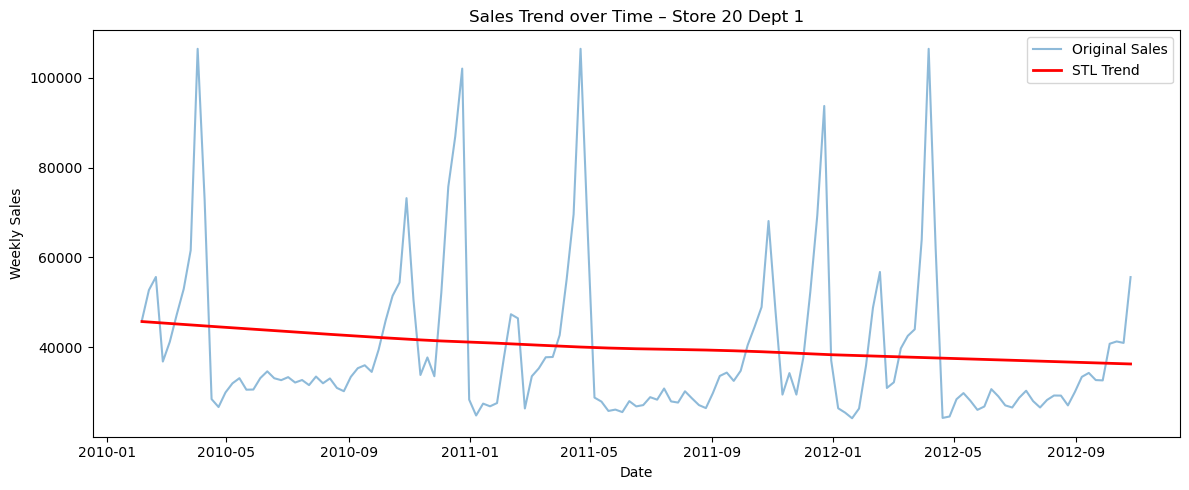

In [42]:
# Visualizing sales trend over time for Store 20 Dept 1
store, dept = 20, 1
example = df[(df['Store'] == store) & (df['Dept'] == dept)].copy()
example = example.set_index('Date').sort_index().asfreq('W-FRI')
example['Weekly_Sales'] = example['Weekly_Sales'].interpolate()
stl = STL(example['Weekly_Sales'], seasonal=13)
result = stl.fit()
example['Trend'] = result.trend

plt.figure(figsize=(12,5))
plt.plot(example.index, example['Weekly_Sales'], label='Original Sales', alpha=0.5)
plt.plot(example.index, example['Trend'], label='STL Trend', linewidth=2, color='red')
plt.title(f'Sales Trend over Time – Store {store} Dept {dept}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.tight_layout()
plt.show()

This graph shows the sales trend for Store 20, Dept 1 over time. In light blue, the **Original Sales** data reveals peaks at regular intervals, suggesting seasonal fluctuations. The **STL Trend**, shown in red, provides a smoothed representation of the underlying trend in sales, indicating a slight decline over the period. This analysis helps isolate the trend from the seasonal variations, giving a clearer picture of long-term performance.

### Visualize Seasonal Variations


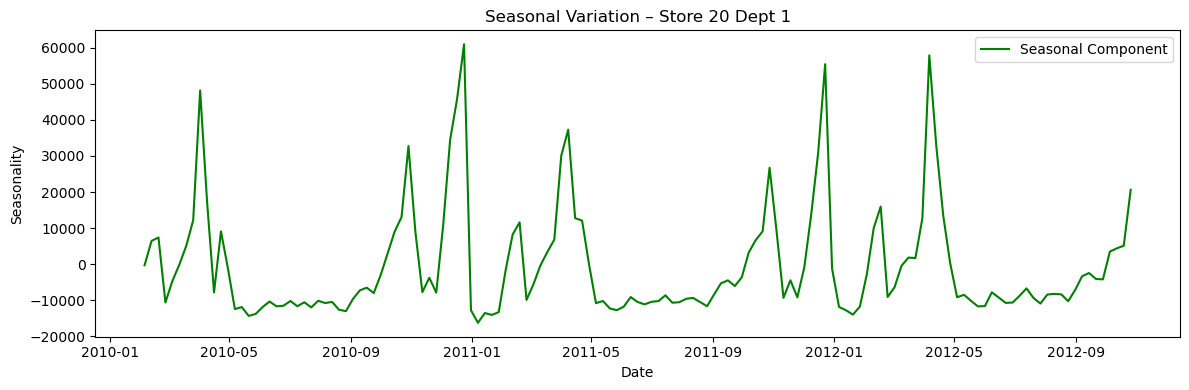

In [43]:
example['Seasonal'] = result.seasonal
plt.figure(figsize=(12,4))
plt.plot(example.index, example['Seasonal'], label='Seasonal Component', color='green')
plt.title(f'Seasonal Variation – Store {store} Dept {dept}')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.legend()
plt.tight_layout()
plt.show()

This graph illustrates the **Seasonal Variation** of sales for Store 20, Dept 1. The green line represents the seasonal component extracted from the sales data, highlighting patterns that recur regularly over time. Peaks and troughs indicate periods of higher and lower sales, likely due to factors such as holidays, promotions, or other recurring events. Understanding these seasonal patterns helps in planning and optimizing inventory and marketing strategies.

### Compare Trends Across Departments


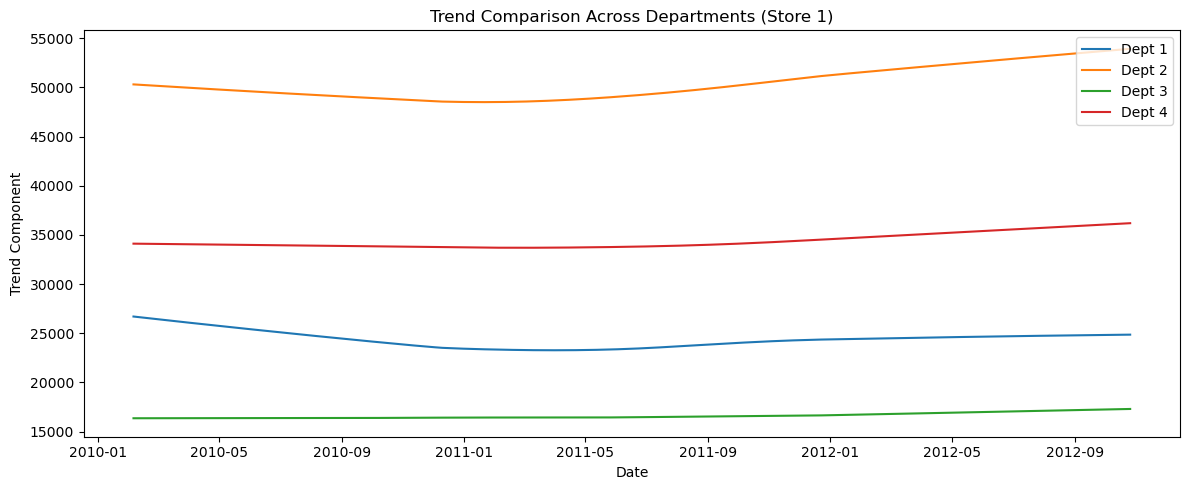

In [44]:
plt.figure(figsize=(12,5))
for dept_id in range(1,5):
    group = df[(df['Store'] == 6) & (df['Dept'] == dept_id)].copy()
    group = group.set_index('Date').sort_index().asfreq('W-FRI')
    group['Weekly_Sales'] = group['Weekly_Sales'].interpolate()
    if group.shape[0] > 10:
        stl = STL(group['Weekly_Sales'], seasonal=13)
        trend = stl.fit().trend
        plt.plot(group.index, trend, label=f'Dept {dept_id}')

plt.title('Trend Comparison Across Departments (Store 1)')
plt.xlabel('Date')
plt.ylabel('Trend Component')
plt.legend()
plt.tight_layout()

This graph illustrates the sales trends for different departments in Store 1:

- **Dept 1 (Blue)**: Slight downward trend, indicating a gradual decline in sales.
- **Dept 2 (Orange)**: Minor upward trend, suggesting slight sales growth.
- **Dept 3 (Green)**: Mostly stable, with minimal change.
- **Dept 4 (Red)**: Steady upward trend, reflecting consistent growth.

This analysis helps identify departments experiencing growth or decline, aiding in strategic planning.

## 3. Data Visualization and Interpretation

In [45]:
# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek

### Visualization 1: Distribution of Weekly Sales

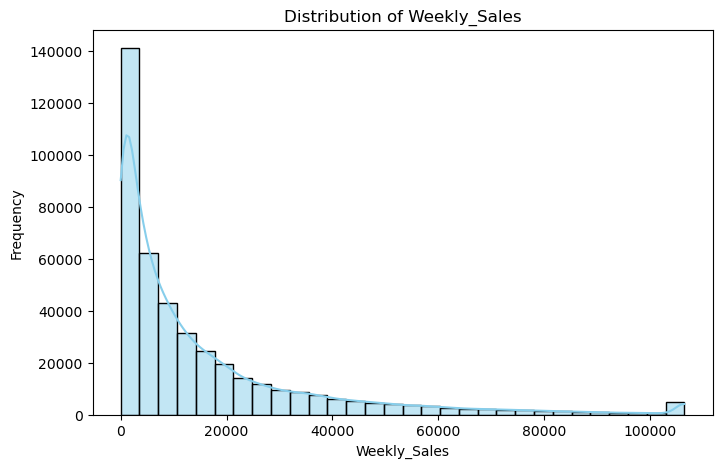

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Weekly_Sales', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Weekly_Sales')
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

This histogram depicts the **Distribution of Weekly Sales**. The data is right-skewed, with most sales figures clustered at lower values. The frequency decreases as sales values increase, indicating that high sales figures are less common. This distribution helps identify typical sales patterns and outlier sales performances.

### Visualization 2: Temperature Distribution

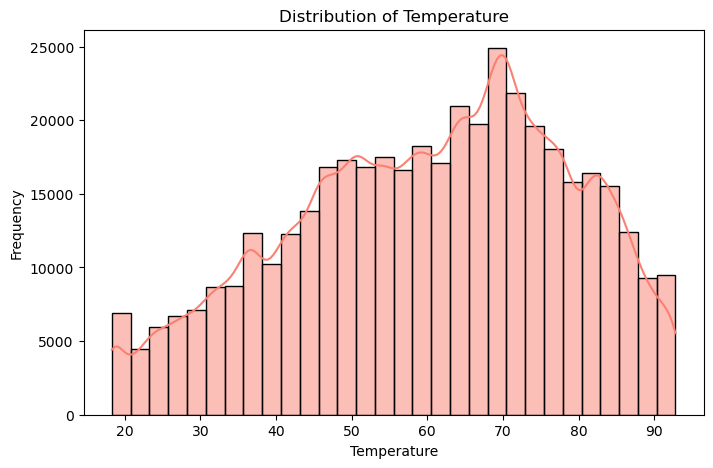

In [47]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Temperature', kde=True, bins=30, color='salmon')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

This histogram displays the **Distribution of Temperature**. It follows a roughly normal distribution, peaking around 70 degrees. The frequencies taper off symmetrically on either side of the peak, indicating most temperatures fall within a mid-range cluster. This distribution helps identify typical temperature ranges and assess variability.

### Visualization 3: Fuel Price Distribution

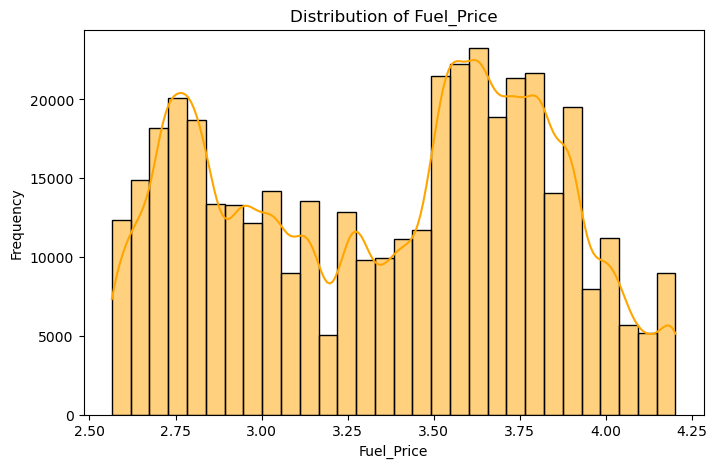

In [48]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Fuel_Price', kde=True, bins=30, color='orange')
plt.title('Distribution of Fuel_Price')
plt.xlabel('Fuel_Price')
plt.ylabel('Frequency')
plt.show()

This histogram illustrates the **Distribution of Fuel Price**. It shows multiple peaks, suggesting a multimodal distribution. The highest frequency occurs around 2.75 USD  to  3.00 USD. This variation may reflect changes in economic conditions or market dynamics. Understanding this distribution helps assess the impact of fuel price changes over time.

### Visualization 4: CPI Distribution

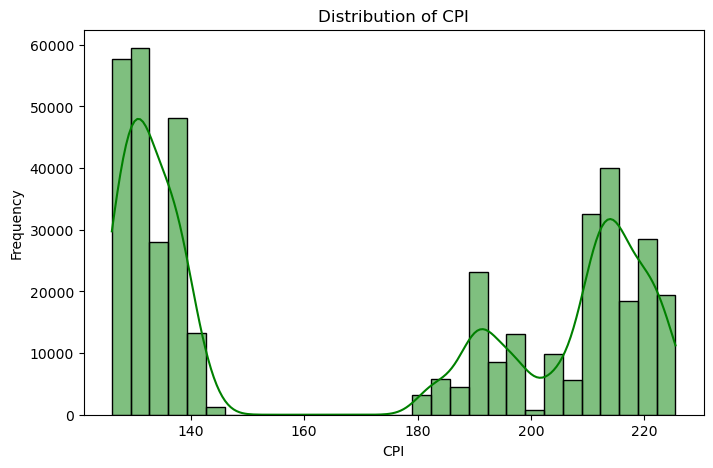

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='CPI', kde=True, bins=30, color='green')
plt.title('Distribution of CPI')
plt.xlabel('CPI')
plt.ylabel('Frequency')
plt.show()

This histogram shows the **Distribution of CPI** (Consumer Price Index). It has a bimodal distribution with peaks around 130 and 210, indicating two distinct groups in the dataset. These variations may reflect changes in economic conditions over time. Understanding this distribution helps analyze inflation trends and cost-of-living adjustments.

### Visualization 5: Overall Sales Trends

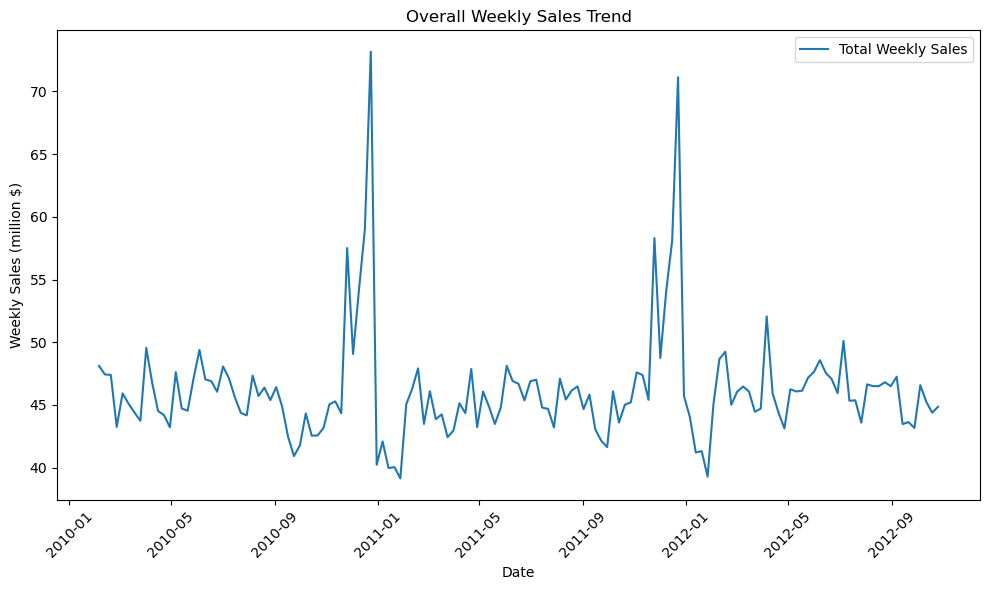

In [50]:
plt.figure(figsize=(10, 6))
overall_sales = df.groupby('Date')['Weekly_Sales'].sum()
# Convert sales to millions for better readability
overall_sales_millions = overall_sales / 1e6
plt.plot(overall_sales_millions.index, overall_sales_millions.values, label='Total Weekly Sales')
plt.title('Overall Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Weekly Sales (million $)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

This line graph illustrates the **Overall Weekly Sales Trend** over time. The data shows periodic peaks, likely corresponding to high-demand seasons or events. After each peak, sales return to a steadier, lower range. These patterns help in understanding sales fluctuations and planning inventory and marketing strategies.

### Visualization 6: Sales trend per store (top 5 stores)

In [51]:
import pandas as pd
import plotly.express as px

# Calculate the rolling average for weekly sales
window_size = 4
top_stores = df.groupby('Store')['Weekly_Sales'].sum().nlargest(5).index

# Prepare data for Plotly by calculating rolling averages
plot_data = []

for store in top_stores:
    store_data = df[df['Store'] == store].groupby('Date')['Weekly_Sales'].sum().rolling(window=window_size).mean()
    temp_df = pd.DataFrame({
        'Date': store_data.index,
        'Weekly_Sales': store_data.values,
        'Store': f'Store {store}'
    })
    plot_data.append(temp_df)

# Concatenate all the data for Plotly
plot_data = pd.concat(plot_data)

# Create the interactive plot
fig = px.line(plot_data, x='Date', y='Weekly_Sales', color='Store',
              title='Interactive Rolling Average of Weekly Sales Trend for Top 5 Stores')

fig.update_traces(mode='lines+markers')
fig.update_layout(xaxis_title='Date', yaxis_title='Weekly Sales (Rolling Average)')
fig.show()

This interactive line graph shows the **Rolling Average of Weekly Sales Trend** for the top 5 stores. Each colored line represents a store's sales trend over time. The graph smooths short-term fluctuations, highlighting broader trends and seasonal patterns. Peaks suggest high-demand periods, while rolling averages enable comparison across stores, helping identify performance variations.

### Visualization 7: Sales trend per department (top 5 departments)

In [52]:
import pandas as pd
import plotly.express as px

# Determine the top 5 departments by total sales
top_depts = df.groupby('Dept')['Weekly_Sales'].sum().nlargest(5).index

# Prepare data for Plotly
plot_data = []

for dept in top_depts:
    dept_data = df[df['Dept'] == dept].groupby('Date')['Weekly_Sales'].sum()
    temp_df = pd.DataFrame({
        'Date': dept_data.index,
        'Weekly_Sales': dept_data.values,
        'Department': f'Dept {dept}'
    })
    plot_data.append(temp_df)

# Concatenate data for Plotly
plot_data = pd.concat(plot_data)

# Create the interactive plot
fig = px.line(plot_data, x='Date', y='Weekly_Sales', color='Department',
              title='Weekly Sales Trend for Top 5 Departments')

fig.update_traces(mode='lines+markers')
fig.update_layout(xaxis_title='Date', yaxis_title='Weekly Sales ($)')
fig.show()

This interactive line graph displays the **Weekly Sales Trend for the Top 5 Departments**. Each line represents sales over time for a different department, showing fluctuations and seasonal patterns. Peaks indicate high-demand periods. This visualization helps compare performance across departments and identify trends and cyclical behaviors in sales.

### Visualization 8: Seasonality: Monthly sales

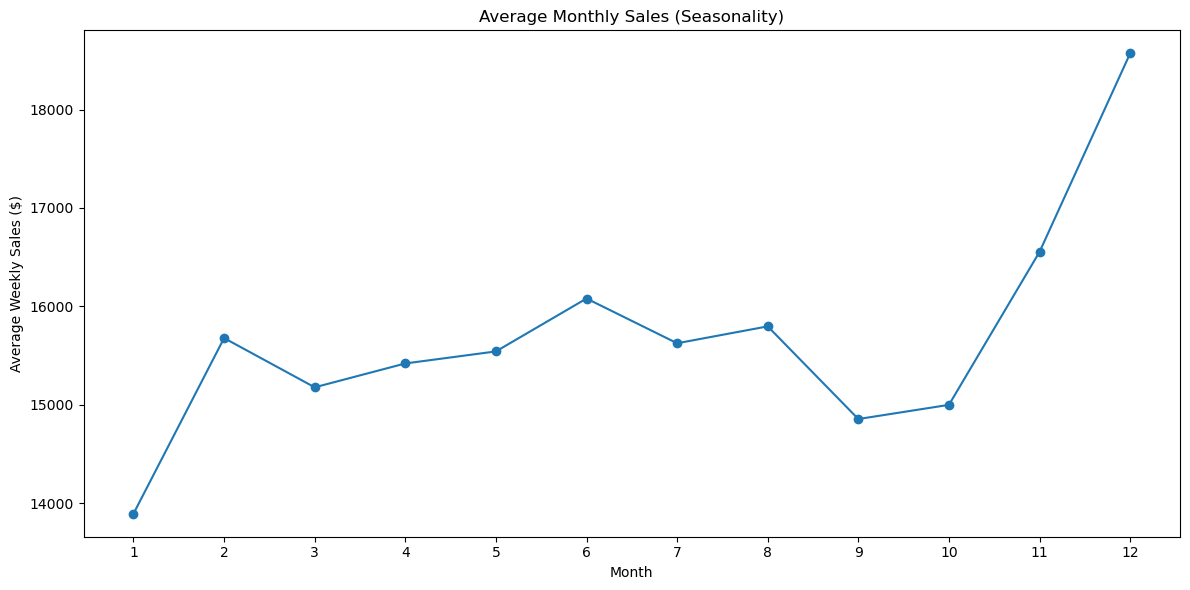

In [53]:
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Average Monthly Sales (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

This line graph presents the **Average Monthly Sales (Seasonality)**. Each point shows the average weekly sales for a given month, highlighting monthly sales patterns. Noticeable peaks occur in December, indicating increased sales during the holiday season. This visualization helps identify seasonal trends and plan for high and low sales months.

### Visualization 9: Impact of External Factors (CPI)

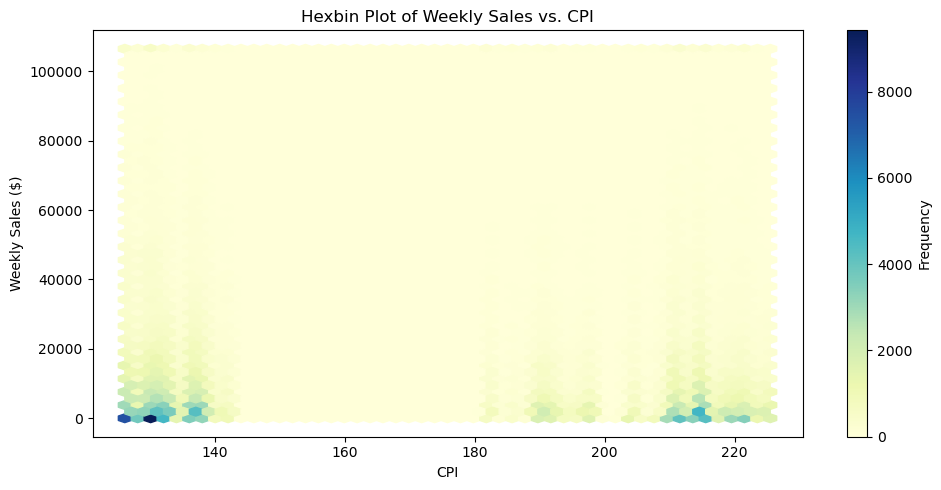

In [54]:
plt.figure(figsize=(10, 5))
plt.hexbin(df['CPI'], df['Weekly_Sales'], gridsize=50, cmap='YlGnBu')
plt.colorbar(label='Frequency')
plt.title('Hexbin Plot of Weekly Sales vs. CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales ($)')
plt.tight_layout()
plt.show()

This hexbin plot shows the relationship between **Weekly Sales and CPI** (Consumer Price Index). Each hexagon represents the frequency of data points falling within it. Darker areas indicate higher concentrations of data. The plot suggests a concentration of sales at lower CPI values, helping to visualize correlations between economic conditions and sales.

### Visualization 10: Impact of External Factors (Fuel_Price)

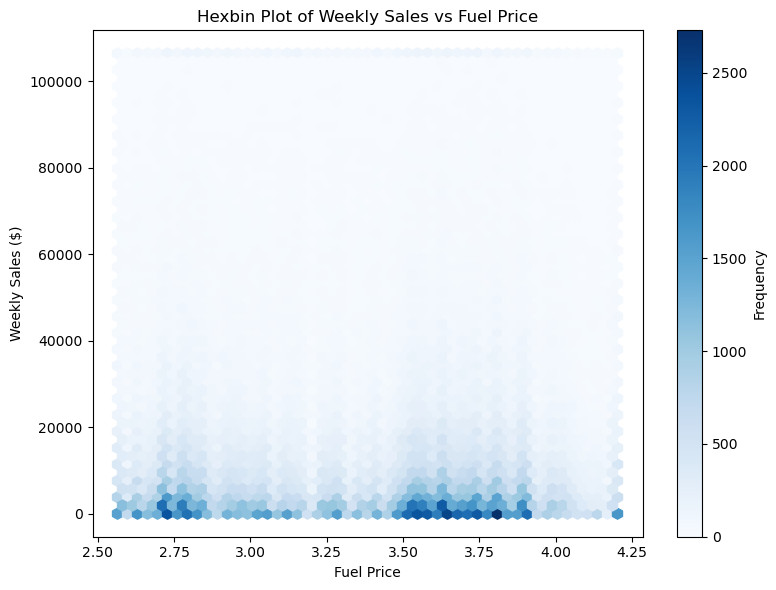

In [55]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['Fuel_Price'], df['Weekly_Sales'], gridsize=50, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hexbin Plot of Weekly Sales vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales ($)')
plt.tight_layout()
plt.show()

The hexbin plot shows how **Weekly Sales** vary with **Fuel Price**. Most sales data are concentrated at lower sales values regardless of fuel price, as indicated by the darker hexagons near the bottom. This suggests that weekly sales don't significantly fluctuate with changes in fuel prices, indicating a weak correlation between these variables.

### Visualization 11: Impact of External Factors (Unemployment)

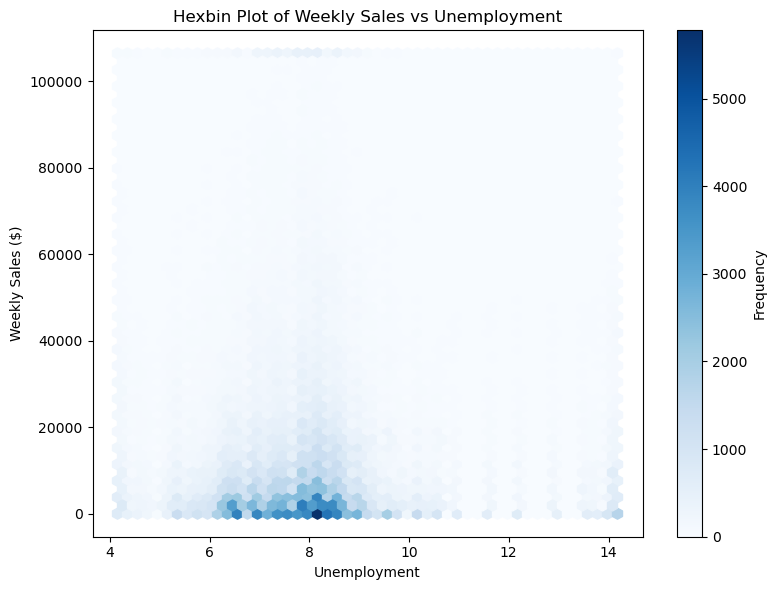

In [56]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['Unemployment'], df['Weekly_Sales'], gridsize=50, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hexbin Plot of Weekly Sales vs Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales ($)')
plt.tight_layout()
plt.show()

The hexbin plot visualizes the relationship between **weekly sales and unemployment**. Darker hexagons represent higher densities of data points, indicating where data is clustered. It reveals that most sales occur at lower unemployment rates, with a concentration at lower weekly sales values. This helps in understanding possible correlations or patterns between unemployment levels and sales performance, suggesting that sales are predominantly clustered around certain unemployment levels.

### Visualization 12: Impact of External Factors (Temperature)

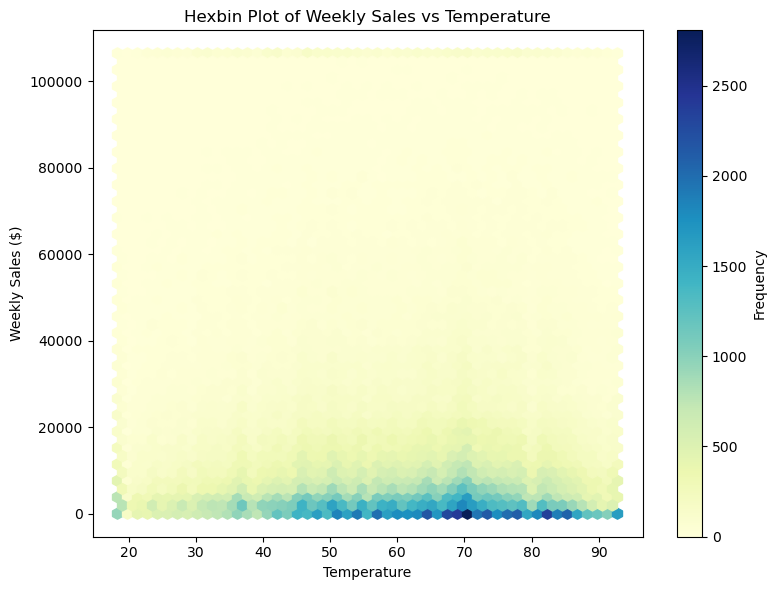

In [57]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['Temperature'], df['Weekly_Sales'], gridsize=50, cmap='YlGnBu')
plt.colorbar(label='Frequency')
plt.title('Hexbin Plot of Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales ($)')
plt.tight_layout()
plt.show()

The hexbin plot visualizes the relationship between **weekly sales and temperature**, with darker hexagons indicating higher data point densities. The plot shows that most sales occur at moderate temperature ranges, with a concentration of sales at lower weekly sales values. This visualization aids in identifying possible correlations or patterns between temperature variations and sales performance, highlighting that sales cluster around specific temperature levels.

### Visualization 13: Holiday vs Non-Holiday Sales

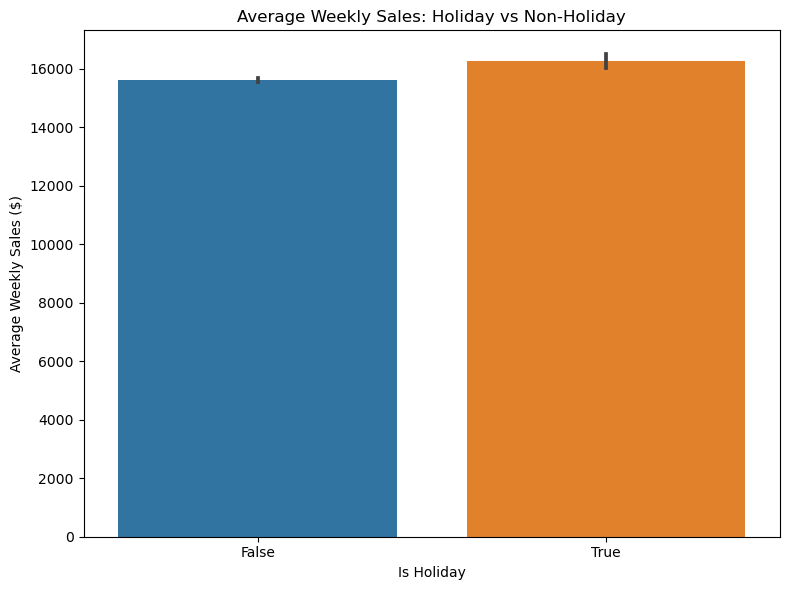

In [58]:
plt.figure(figsize=(8, 6))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales ($)')
plt.tight_layout()
plt.show()

The bar chart compares **average weekly sales during holiday periods and non-holiday periods**. It shows that average sales are slightly higher during holidays compared to non-holidays. This visualization highlights the impact of holidays on sales performance, indicating a modest increase in sales during holiday weeks.

### Visualization 14: Average Weekly Sales by Store Type

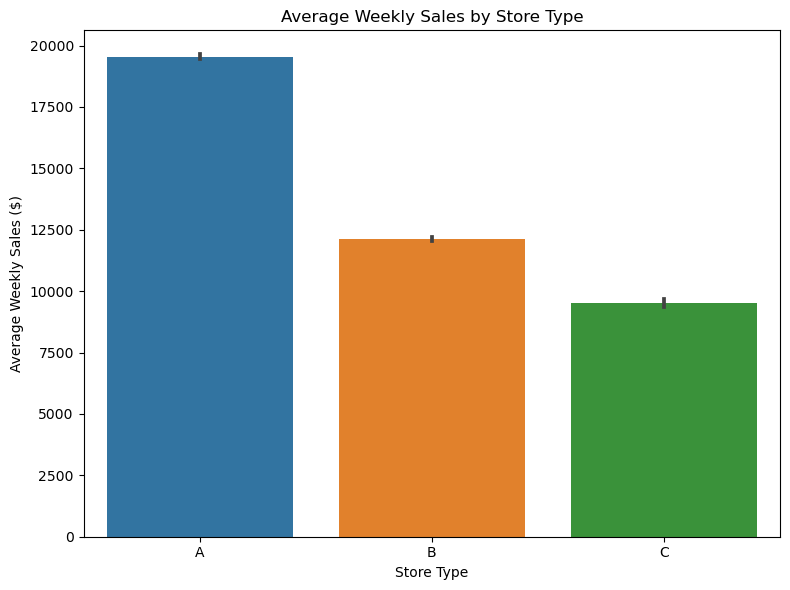

In [59]:
# Average sales by store type
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Weekly_Sales', data=df, order=['A', 'B', 'C'])
plt.title('Average Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales ($)')
plt.tight_layout()
plt.show()

The bar chart illustrates **average weekly sales across different store types**. Store Type A shows the highest average sales, while Type C has the lowest. This visualization highlights the differences in sales performance across store types, suggesting that Store Type A is the most successful in terms of sales.

### Visualization 15: Store Size vs. Weekly Sales by Type

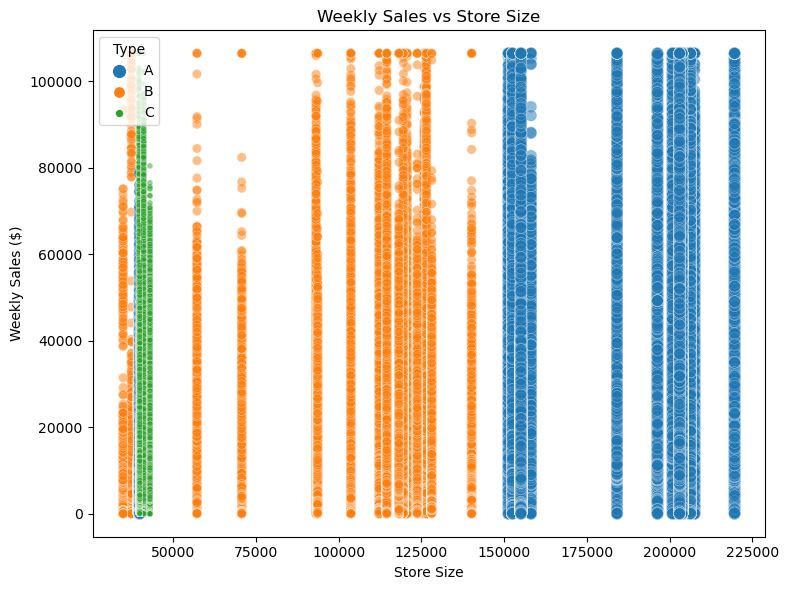

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Size', y='Weekly_Sales', hue='Type', size='Type', data=df, alpha=0.5)
plt.title('Weekly Sales vs Store Size')
plt.xlabel('Store Size')
plt.ylabel('Weekly Sales ($)')
plt.tight_layout()
plt.show()

The scatter plot shows the relationship between store size and weekly sales, categorized by store type:

- **Type A**: Larger sizes with higher sales, indicating strong performance.
- **Type B**: Moderate sizes and sales, displaying consistency.
- **Type C**: Smaller sizes and sales, suggesting more limited performance.

Larger stores typically achieve higher sales, with Type A leading overall.

### Visualization 16: Total markdown effect on Weekly Sales

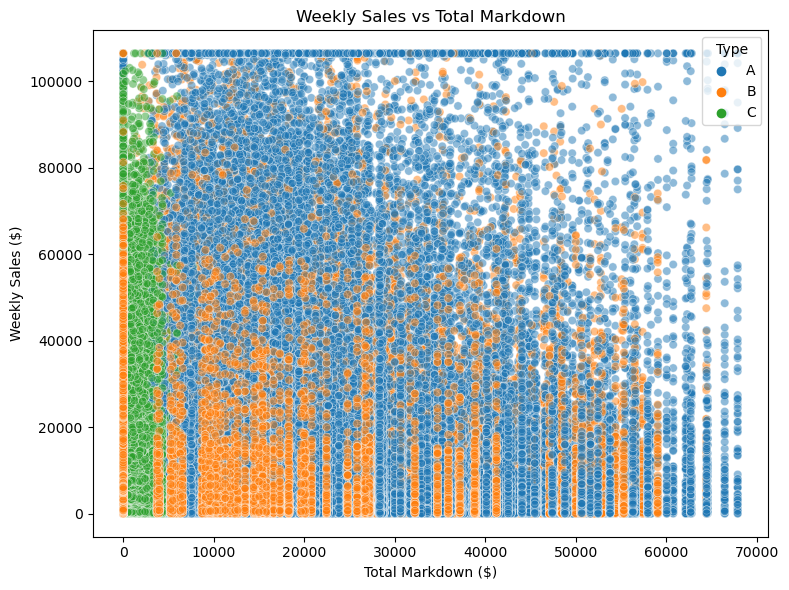

In [61]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df['Total_MarkDown'] = df[markdown_cols].sum(axis=1)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_MarkDown', y='Weekly_Sales', hue='Type', data=df, alpha=0.5)
plt.title('Weekly Sales vs Total Markdown')
plt.xlabel('Total Markdown ($)')
plt.ylabel('Weekly Sales ($)')
plt.tight_layout()
plt.show()

The scatter plot illustrates the relationship between weekly sales and total markdown, segmented by store type (A, B, C). Higher markdowns generally correlate with higher sales, especially for Store Type A. Types B and C have lower markdowns and sales, with a denser concentration at the lower end. This suggests markdowns may enhance sales, particularly in larger stores.

### Visualization 17: Impact of Markdown on Weekly Sales Across Store Types

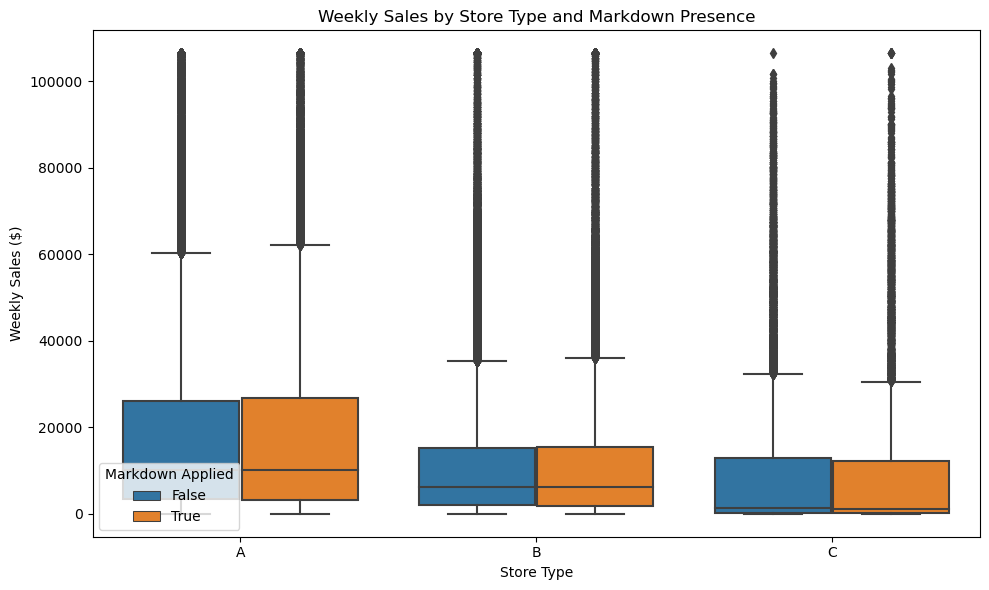

In [63]:
df['Markdown_Applied'] = df['Total_MarkDown'] > 0

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Type',
    y='Weekly_Sales',
    hue='Markdown_Applied',
    data=df
)
plt.title('Weekly Sales by Store Type and Markdown Presence')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales ($)')
plt.legend(title='Markdown Applied')
plt.tight_layout()
plt.show()

The box plot illustrates the effect of markdown presence on weekly sales for different store types (A, B, C). Stores with markdowns (orange) show slightly higher median sales, especially in Types A and B. Type C shows less variation. The presence of markdowns enhances median sales, particularly in larger stores.


### Visualization 18: Variability in Average Weekly Sales Across Departments

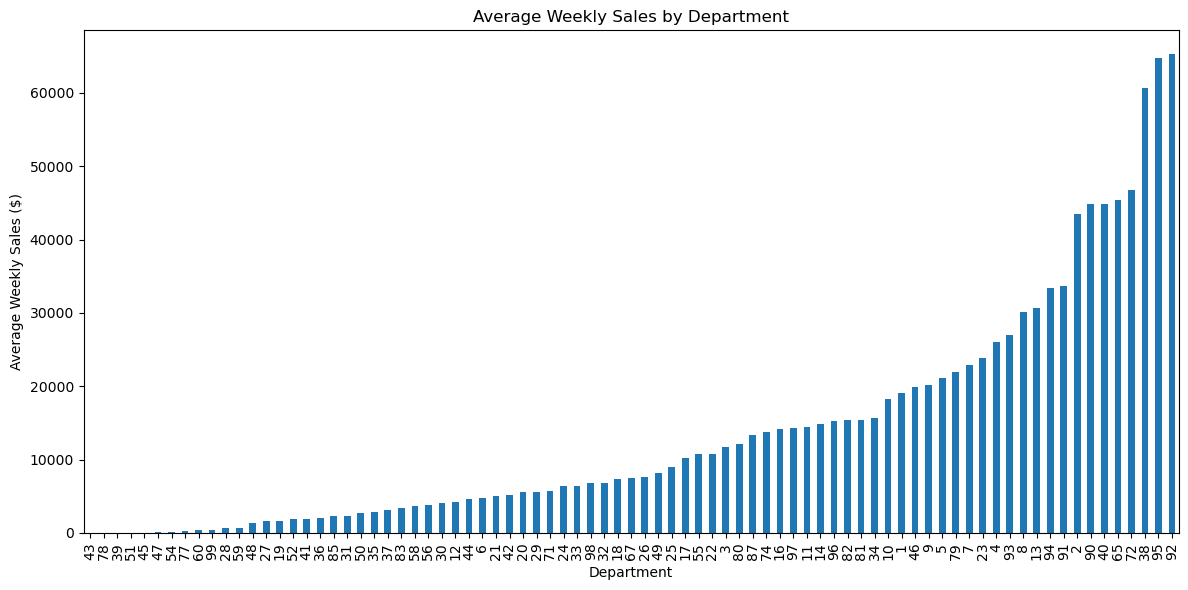

In [64]:
dept_sales = df.groupby('Dept')['Weekly_Sales'].mean().sort_values()
plt.figure(figsize=(12, 6))
dept_sales.plot(kind='bar')
plt.title('Average Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The bar chart displays average weekly sales for each department, highlighting significant variability:

- **Top Performers**: Departments 92, 38, and 95 show the highest sales, exceeding 60,000, indicating strong consumer demand.
- **Moderate Performers**: Departments ranging from 70 to 83 have sales between 20,000 and 40,000, showing steady contributions.
- **Lower Performers**: Departments like 43 and 78 fall below 5,000, suggesting limited sales impact.

This variability underscores differences in product popularity and departmental focus within the overall sales strategy.

### Visualization 19: Correlation Matrix

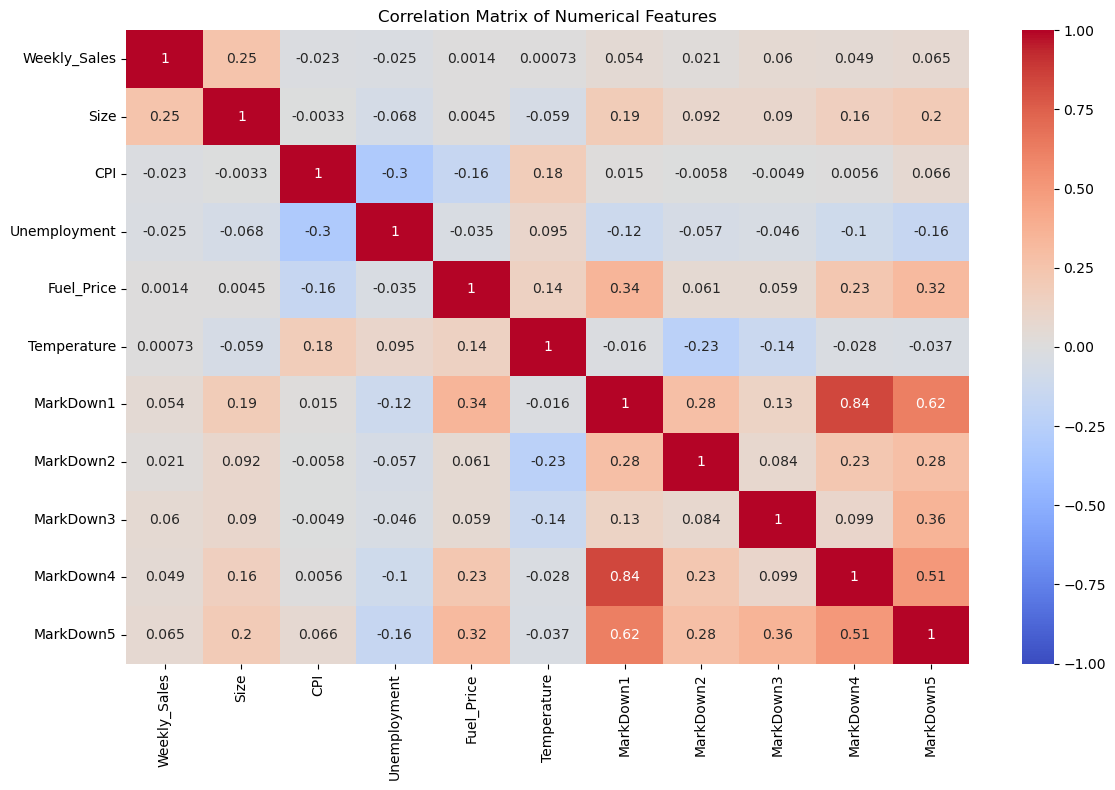

In [66]:
plt.figure(figsize=(12, 8))
numeric_cols = ['Weekly_Sales', 'Size', 'CPI', 'Unemployment', 'Fuel_Price', 'Temperature'] + markdown_cols
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

This correlation matrix displays relationships between numerical features:

- **Weekly Sales**: Positively correlated with store size (0.25).
- **Fuel Price**: Shows a moderate positive correlation with some markdowns, particularly MarkDown1 (0.34).
- **CPI & Unemployment**: Negatively correlated, indicating inverse relationships (-0.3).
- **MarkDowns**: Strong inter-correlations, especially between MarkDown1 and MarkDown4 (0.84).

The matrix highlights key interactions, aiding in understanding feature impacts on sales.

## 4. Market Basket Analysis

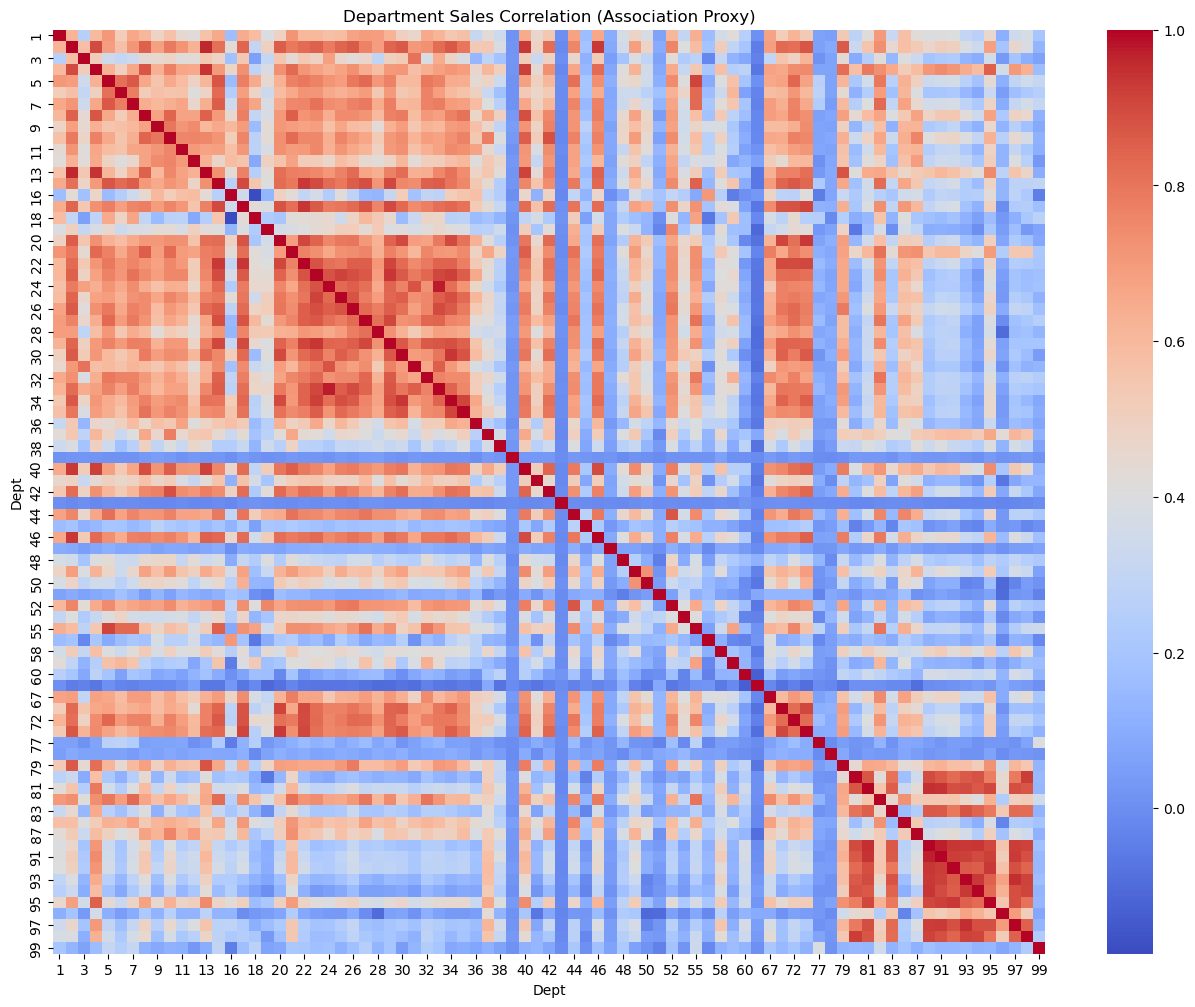

Top Department Pairs for Cross-Selling Opportunities:
    Dept1  Dept2  Correlation
22     24     33     0.974735
31     90     91     0.970425
0       2     13     0.960125
44     93     97     0.953253
28     81     90     0.947160
3       4     13     0.941667
29     81     91     0.941228
24     30     34     0.939516
32     90     92     0.937850
34     90     94     0.937198
10     17     22     0.936678
19     23     29     0.935516
33     90     93     0.935026
8      14     22     0.934887
43     93     94     0.934718
2       2     46     0.932972
15     20     74     0.932024
1       2     40     0.931386
42     92     95     0.931279
41     91     97     0.927256
38     91     92     0.924981
36     90     97     0.922869
27     80     98     0.922211
4       4     40     0.920728
39     91     93     0.919767
21     23     34     0.916958
40     91     95     0.916644
37     90     98     0.916523
6      13     40     0.916430
18     23     25     0.915128
45     93     98

In [68]:
# 1. Pivot to create a matrix of Weekly Sales per Store per Department over Time
dept_sales = df.pivot_table(index=['Date', 'Store'], columns='Dept', values='Weekly_Sales', aggfunc='sum').fillna(0)

# 2. Calculate Correlation Matrix
corr_matrix = dept_sales.corr()

# 3. Visualize Correlation (Proxy for Association)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Department Sales Correlation (Association Proxy)')
plt.show()

# 4. Identify Strong Associations (e.g., > 0.6 correlation)
threshold = 0.9
associated_pairs = []
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i < j and corr_matrix.loc[i, j] > threshold:
            associated_pairs.append((i, j, corr_matrix.loc[i, j]))

# Display top pairs
assoc_df = pd.DataFrame(associated_pairs, columns=['Dept1', 'Dept2', 'Correlation'])
assoc_df.sort_values('Correlation', ascending=False, inplace=True)
print("Top Department Pairs for Cross-Selling Opportunities:")
print(assoc_df)

**Market Basket Analysis Insights**

In this analysis, we examined department sales data to infer potential product associations between different departments:

- **Inference of Product Associations**: Although specific customer transaction data isn't available, the correlation between department sales helps identify which departments have similar sales patterns, suggesting potential product associations.

- **Cross-Selling Strategies**: The top department pairs, such as (24, 33), (91, 90), and (13, 2), show strong correlations, indicating that products in these departments are often purchased together. By leveraging these associations, retailers can develop cross-selling strategies, such as joint promotions or strategic product placements, to enhance sales opportunities across these strongly associated departments.


## 5. Feature Engineering

### Feature Addition

#### Time-Based Features

In [69]:
# Ensure IsHoliday is binary (0 or 1)
df['IsHoliday'] = df['IsHoliday'].fillna(0)
df['IsHoliday'] = df['IsHoliday'].astype(int)

**Days from Holidays Features**

In [70]:
# Ensure 'Date' column is datetime64
df['Date'] = pd.to_datetime(df['Date'])

# Extract holiday dates from IsHoliday column
holiday_dates = df[df['IsHoliday'] == True]['Date'].unique()
holidays_df = pd.DataFrame({'HolidayDate': pd.to_datetime(holiday_dates)})

# Sort holidays_df to ensure chronological order for searchsorted
holidays_df = holidays_df.sort_values('HolidayDate')

# Calculate DaysSinceLastHoliday
last_holiday_idx = holidays_df['HolidayDate'].searchsorted(df['Date'], side='right') - 1
last_holiday_dates = holidays_df['HolidayDate'].iloc[last_holiday_idx.clip(0)].values
df['DaysSinceLastHoliday'] = (df['Date'] - last_holiday_dates).dt.days
df.loc[last_holiday_idx < 0, 'DaysSinceLastHoliday'] = np.nan  # Assign NaN if no past holiday

# Calculate DaysUntilNextHoliday
next_holiday_idx = holidays_df['HolidayDate'].searchsorted(df['Date'], side='left')
next_holiday_dates = holidays_df['HolidayDate'].iloc[next_holiday_idx.clip(0, len(holidays_df) - 1)].values
df['DaysUntilNextHoliday'] = (next_holiday_dates - df['Date']).dt.days
df.loc[next_holiday_idx >= len(holidays_df), 'DaysUntilNextHoliday'] = np.nan  # Assign NaN if no future holiday

# Replace NaN with 0
df['DaysSinceLastHoliday'] = df['DaysSinceLastHoliday'].fillna(0)
df['DaysUntilNextHoliday'] = df['DaysUntilNextHoliday'].fillna(0)

# Display first few rows to verify
print(df[['Date', 'IsHoliday', 'DaysSinceLastHoliday', 'DaysUntilNextHoliday']].head(10))

        Date  IsHoliday  DaysSinceLastHoliday  DaysUntilNextHoliday
0 2010-02-05          0                   0.0                   7.0
1 2010-02-12          1                   0.0                   0.0
2 2010-02-19          0                   7.0                 203.0
3 2010-02-26          0                  14.0                 196.0
4 2010-03-05          0                  21.0                 189.0
5 2010-03-12          0                  28.0                 182.0
6 2010-03-19          0                  35.0                 175.0
7 2010-03-26          0                  42.0                 168.0
8 2010-04-02          0                  49.0                 161.0
9 2010-04-09          0                  56.0                 154.0


This code calculates two new features for each date in a sales dataset:

- **DaysSinceLastHoliday**: Represents the number of days since the last holiday occurred. If no past holiday is present, it defaults to zero.
- **DaysUntilNextHoliday**: Indicates the number of days until the next holiday. If no future holiday exists, it defaults to zero.

These features provide insights into potential sales impacts related to holiday proximity, enabling better forecasting and planning around holiday-related sales fluctuations.

**Weeks around Holiday**

In [71]:
# Calculate WeekBeforeHoliday and WeekAfterHoliday
df['WeekBeforeHoliday'] = 0
df['WeekAfterHoliday'] = 0

for hdate in holiday_dates:
    # Week before: 1 to 7 days before the holiday
    week_before_start = hdate - pd.Timedelta(days=7)
    week_before_end = hdate
    df.loc[(df['Date'] >= week_before_start) & (df['Date'] < week_before_end), 'WeekBeforeHoliday'] = 1

    # Week after: 0 to 7 days after the holiday
    week_after_start = hdate
    week_after_end = hdate + pd.Timedelta(days=7)
    df.loc[(df['Date'] >= week_after_start) & (df['Date'] < week_after_end), 'WeekAfterHoliday'] = 1

This code introduces two features to pinpoint sales periods around holidays:

- **WeekBeforeHoliday**: Marks the week preceding a holiday (1 to 7 days before).
- **WeekAfterHoliday**: Marks the week following a holiday (0 to 7 days after).

By highlighting these periods, businesses can better analyze sales trends and patterns surrounding holidays. These insights can aid in crafting targeted promotions and inventory strategies to optimize holiday-related sales activities.

In [72]:
df.head()

Store  Dept       Date  anomaly_consensus  Weekly_Sales Type    Size  \
0      1     1 2010-02-05                  0      24924.50    A  151315   
1      1     1 2010-02-12                  0      46039.49    A  151315   
2      1     1 2010-02-19                  0      41595.55    A  151315   
3      1     1 2010-02-26                  0      19403.54    A  151315   
4      1     1 2010-03-05                  0      21827.90    A  151315   

   Temperature  Fuel_Price  MarkDown1  ...  Year  Month  WeekOfYear  \
0        42.31       2.572        0.0  ...  2010      2           5   
1        38.51       2.565        0.0  ...  2010      2           6   
2        39.93       2.565        0.0  ...  2010      2           7   
3        46.63       2.565        0.0  ...  2010      2           8   
4        46.50       2.625        0.0  ...  2010      3           9   

   DayOfWeek  Total_MarkDown  Markdown_Applied  DaysSinceLastHoliday  \
0          4             0.0             False                   0.0   
1          4             0.0             False                   0.0   
2          4             0.0             False                   7.0   
3          4             0.0             False                  14.0   
4          4             0.0             False                  21.0   

   DaysUntilNextHoliday  WeekBeforeHoliday  WeekAfterHoliday  
0                   7.0                  1                 0  
1                   0.0                  0                 1  
2                 203.0                  0                 0  
3                 196.0                  0                 0  
4                 189.0                  0                 0  

[5 rows x 30 columns]

**Season of the Week**

In [73]:
# Define seasons based on Month
# Spring: March (3) to May (5)
# Summer: June (6) to August (8)
# Fall: September (9) to November (11)
# Winter: December (12) to February (2)
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:  # 12, 1, 2
        return 'Winter'

df['Season'] = df['Month'].apply(get_season)

df.head()

Store  Dept       Date  anomaly_consensus  Weekly_Sales Type    Size  \
0      1     1 2010-02-05                  0      24924.50    A  151315   
1      1     1 2010-02-12                  0      46039.49    A  151315   
2      1     1 2010-02-19                  0      41595.55    A  151315   
3      1     1 2010-02-26                  0      19403.54    A  151315   
4      1     1 2010-03-05                  0      21827.90    A  151315   

   Temperature  Fuel_Price  MarkDown1  ...  Month  WeekOfYear  DayOfWeek  \
0        42.31       2.572        0.0  ...      2           5          4   
1        38.51       2.565        0.0  ...      2           6          4   
2        39.93       2.565        0.0  ...      2           7          4   
3        46.63       2.565        0.0  ...      2           8          4   
4        46.50       2.625        0.0  ...      3           9          4   

   Total_MarkDown  Markdown_Applied  DaysSinceLastHoliday  \
0             0.0             False                   0.0   
1             0.0             False                   0.0   
2             0.0             False                   7.0   
3             0.0             False                  14.0   
4             0.0             False                  21.0   

   DaysUntilNextHoliday  WeekBeforeHoliday  WeekAfterHoliday  Season  
0                   7.0                  1                 0  Winter  
1                   0.0                  0                 1  Winter  
2                 203.0                  0                 0  Winter  
3                 196.0                  0                 0  Winter  
4                 189.0                  0                 0  Spring  

[5 rows x 31 columns]

This code defines seasons based on the month of the year and adds a "Season" column to the dataset:

- **Spring**: March (3) to May (5)
- **Summer**: June (6) to August (8)
- **Fall**: September (9) to November (11)
- **Winter**: December (12) to February (2)

By categorizing each month into its respective season, the dataset can be analyzed for seasonal trends in sales, enabling strategic planning and inventory management throughout the year.

#### Lagged Features

In [74]:
# Sort df for time-series operations
df = df.sort_values(['Store', 'Dept', 'Date'])

# Create Lagged Features (1 and 2 weeks)
lag_columns = ['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
               'MarkDown5', 'CPI', 'Unemployment', 'Fuel_Price', 'Temperature']

for col in lag_columns:
    for lag in [1, 2]:
        df[f'{col}_Lag_{lag}_Week'] = df.groupby(['Store', 'Dept'])[col].shift(lag)

# Create Rolling Window Features (4 and 12 weeks)
rolling_columns = ['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in rolling_columns:
    for window in [4, 12]:
        grouped = df.groupby(['Store', 'Dept'])[col]
        df[f'{col}_Rolling_Mean_{window}_Week'] = (
            grouped.rolling(window, min_periods=1)
            .mean()
            .reset_index(level=[0, 1], drop=True)
            .shift(1)
        )
        df[f'{col}_Rolling_Sum_{window}_Week'] = (
            grouped.rolling(window, min_periods=1)
            .sum()
            .reset_index(level=[0, 1], drop=True)
            .shift(1)
        )
        df[f'{col}_Rolling_Std_{window}_Week'] = (
            grouped.rolling(window, min_periods=1)
            .std()
            .reset_index(level=[0, 1], drop=True)
            .shift(1)
        )

# Handle Missing Values Intelligently
# 1. Lag Features: Forward fill within each group
lag_features = [f'{col}_Lag_{lag}_Week' for col in lag_columns for lag in [1, 2]]
df[lag_features] = df.groupby(['Store', 'Dept'])[lag_features].transform(lambda x: x.ffill().bfill())

# 2. Rolling Features: Forward fill, then backward fill within each group
rolling_features = [f'{col}_Rolling_{stat}_{window}_Week'
                    for col in rolling_columns
                    for window in [4, 12]
                    for stat in ['Mean', 'Sum', 'Std']]
df[rolling_features] = df.groupby(['Store', 'Dept'])[rolling_features].transform(lambda x: x.ffill().bfill())

# 3. For any stubborn NaNs (first row in group with no prior or next data), fill with global mean or 0
df[lag_features] = df[lag_features].fillna(df[lag_features].mean())
df[rolling_features] = df[rolling_features].fillna(df[rolling_features].mean())

print("Rows after adding features and imputing missing values:", len(df))
print("Any remaining missing values?", df.isnull().sum().sum())


Rows after adding features and imputing missing values: 421570
Any remaining missing values? 0


This advanced feature engineering process involves creating lagged and rolling window features to capture time-series dependencies:

- **Lagged Features**: For selected columns, lagged values are created for 1 and 2 weeks prior, providing insights into past values' immediate effects on current performance. This helps in understanding short-term trends.

- **Rolling Window Features**: Rolling mean, sum, and standard deviation are calculated for 4 and 12 weeks, offering a smoothed view of the data to capture long-term trends and fluctuations.

- **Missing Values Handling**:
  - Lagged features employ forward and backward filling within each store-department group to fill in gaps.
  - Rolling features use a similar filling technique, ensuring complete data coverage.
  - Any remaining missing values are filled with the global mean, ensuring no gaps in the dataset.

This comprehensive approach enriches the dataset, making it more robust for predictive modeling by highlighting temporal patterns and seasonality.

#### Interaction Features

In [75]:
# Store_Type_IsHoliday: Convert both Type and IsHoliday to strings before concatenation
df['Store_Type_IsHoliday'] = df['Type'].astype(str) + '_' + df['IsHoliday'].astype(str)
df = pd.concat([df, pd.get_dummies(df['Store_Type_IsHoliday'], prefix='Store_Type_IsHoliday')], axis=1)
df = df.drop('Store_Type_IsHoliday', axis=1)

In [76]:
# Markdown_Temperature_Interaction: Sum markdowns and multiply by Temperature
df['Markdown_Temperature_Interaction'] = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1) * df['Temperature']

In [77]:
# Store_Size_CPI_Interaction: Multiply Size by CPI
df['Store_Size_CPI_Interaction'] = df['Size'] * df['CPI']

In [78]:
df.shape

(421570, 95)

This code adds interaction features to capture complex relationships in the data:

- **Store_Type_IsHoliday**: By combining store type and holiday status, dummy variables are created to represent different store-holiday scenarios. This helps identify how sales patterns differ when holidays occur in various store types.

- **Markdown_Temperature_Interaction**: The combined sum of all markdowns is multiplied by the temperature. This feature captures how markdown effectiveness might vary with temperature changes, reflecting seasonal sales strategies.

- **Store_Size_CPI_Interaction**: Store size is multiplied by the Consumer Price Index (CPI). This interaction evaluates how economic conditions (CPI) impact performance relative to store size, offering insights into economic sensitivity.

These interaction features enhance the model's ability to understand underlying patterns, improving predictive accuracy by considering multidimensional relationships.

#### Storage/Department Aggregates

In [79]:
# Store-level averages
store_avg = df.groupby('Store')[['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Total_MarkDown', 'Temperature']].mean().add_prefix('Store_Avg_')
df = df.merge(store_avg, on='Store', how='left')

In [80]:
# Store-Department-level averages
store_dept_avg = df.groupby(['Store', 'Dept'])[['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Total_MarkDown']].mean().add_prefix('Store_Dept_Avg_')
df = df.merge(store_dept_avg, on=['Store', 'Dept'], how='left')

In [81]:
df.shape

(421570, 110)

To enhance analysis, we calculated:

- **Store-Level Averages**: Grouped by `Store`, averaging sales and markdowns, added with a `Store_Avg_` prefix.
- **Store-Department-Level Averages**: Grouped by `Store` and `Dept`, averaging similar metrics, added with a `Store_Dept_Avg_` prefix.

In [83]:
# Print the Columns
df.columns

Index(['Store', 'Dept', 'Date', 'anomaly_consensus', 'Weekly_Sales', 'Type',
       'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       ...
       'Store_Avg_MarkDown5', 'Store_Avg_Total_MarkDown',
       'Store_Avg_Temperature', 'Store_Dept_Avg_Weekly_Sales',
       'Store_Dept_Avg_MarkDown1', 'Store_Dept_Avg_MarkDown2',
       'Store_Dept_Avg_MarkDown3', 'Store_Dept_Avg_MarkDown4',
       'Store_Dept_Avg_MarkDown5', 'Store_Dept_Avg_Total_MarkDown'],
      dtype='object', length=110)

### Handling the Anomalies

Cap anomalous numeric values in the DataFrame using 0.1 and 99th percentiles from non-anomalous data. Apply these caps only to rows marked as anomalies, ensuring outliers are managed effectively.

In [84]:
# Copy the DataFrame
df_handled = df.copy()

# Get numeric columns excluding the anomaly flag
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('anomaly_consensus')

# Cap anomalies based on percentile thresholds
for col in numeric_cols:
    lower = df[df['anomaly_consensus'] == 0][col].quantile(0.01)  # 0.1 percentile
    upper = df[df['anomaly_consensus'] == 0][col].quantile(0.99)   # 99 percentile

    # Apply capping only to anomalous rows
    df_handled.loc[(df['anomaly_consensus'] == 1) & (df[col] < lower), col] = lower
    df_handled.loc[(df['anomaly_consensus'] == 1) & (df[col] > upper), col] = upper
df = df_handled
print("Anomalous values capped using 1 and 99th percentile thresholds.")


Anomalous values capped using 1 and 99th percentile thresholds.


### Categorical Encoding

In [85]:
pd.set_option('display.max_rows', None)
print(df.dtypes)

Store                                         int64
Dept                                          int64
Date                                 datetime64[ns]
anomaly_consensus                             int32
Weekly_Sales                                float64
Type                                       category
Size                                          int64
Temperature                                 float64
Fuel_Price                                  float64
MarkDown1                                   float64
MarkDown2                                   float64
MarkDown3                                   float64
MarkDown4                                   float64
MarkDown5                                   float64
CPI                                         float64
Unemployment                                float64
IsHoliday                                     int32
anomaly_stl                                    bool
anomaly_spc                                    bool
anomaly_iso 

In [86]:
import pandas as pd

# Convert data types
df['Store'] = df['Store'].astype('category')
df['Dept'] = df['Dept'].astype('category')
df['anomaly_consensus'] = df['anomaly_consensus'].astype('bool')
df['IsHoliday'] = df['IsHoliday'].astype('bool')
df['Month'] = df['Month'].astype('category')
df['DayOfWeek'] = df['DayOfWeek'].astype('category')
df['WeekBeforeHoliday'] = df['WeekBeforeHoliday'].astype('bool')
df['WeekAfterHoliday'] = df['WeekAfterHoliday'].astype('bool')

# Check updated dtypes
print(df.dtypes)

Store                                      category
Dept                                       category
Date                                 datetime64[ns]
anomaly_consensus                              bool
Weekly_Sales                                float64
Type                                       category
Size                                          int64
Temperature                                 float64
Fuel_Price                                  float64
MarkDown1                                   float64
MarkDown2                                   float64
MarkDown3                                   float64
MarkDown4                                   float64
MarkDown5                                   float64
CPI                                         float64
Unemployment                                float64
IsHoliday                                      bool
anomaly_stl                                    bool
anomaly_spc                                    bool
anomaly_iso 

In [87]:
import pandas as pd

# Assuming 'df' is your DataFrame

# One-hot encoding for 'Type'
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

# Convert 'Store' and 'Dept' to categorical for label encoding
df['Store'] = df['Store'].astype('category')
df['Dept'] = df['Dept'].astype('category')

# Label encoding for 'Store' and 'Dept'
df['Store_Encoded'] = df['Store'].cat.codes
df['Dept_Encoded'] = df['Dept'].cat.codes

# Convert 'Month' and 'DayOfWeek' to ordinal encoding
df['Month'] = df['Month'].astype('category')
df['DayOfWeek'] = df['DayOfWeek'].astype('category')

df['Month_Encoded'] = df['Month'].cat.codes
df['DayOfWeek_Encoded'] = df['DayOfWeek'].cat.codes

# Convert 'Season' to category and then encode
df['Season'] = df['Season'].astype('category').cat.codes

# Handle binary columns and ensure they’re bool
df['IsHoliday'] = df['IsHoliday'].astype('bool')
df['WeekBeforeHoliday'] = df['WeekBeforeHoliday'].astype('bool')
df['WeekAfterHoliday'] = df['WeekAfterHoliday'].astype('bool')
df['anomaly_consensus'] = df['anomaly_consensus'].astype('bool')

# If you have 'Store_Type_IsHoliday_*' columns as bool
bool_columns = [col for col in df.columns if 'Store_Type_IsHoliday' in col]
df[bool_columns] = df[bool_columns].astype('bool')

# Drop original 'Date' column and any others as needed
df.drop([ 'Month', 'DayOfWeek'], axis=1, inplace=True)

# Verify changes
df.shape

(421570, 113)

1. **One-Hot Encoding**: Transforms the `Type` column into binary columns, preventing ordinal assumptions. Uses `drop_first=True` to avoid multicollinearity.

2. **Label Encoding**: Converts `Store` and `Dept` to integer codes, handling large numbers of categories efficiently.

3. **Ordinal Encoding**: Encodes `Month` and `DayOfWeek` based on their natural order.

4. **Season Encoding**: Converts `Season` into numerical values.

5. **Boolean Conversion**: Ensures all binary columns are properly typed as `bool`.

6. **Data Cleaning**: Removes original `Month` and `DayOfWeek` columns post-encoding.

This prepares the dataset by turning categorical features into numerical ones, optimizing it for model training.

In [88]:
df.columns

Index(['Store', 'Dept', 'Date', 'anomaly_consensus', 'Weekly_Sales', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       ...
       'Store_Dept_Avg_MarkDown3', 'Store_Dept_Avg_MarkDown4',
       'Store_Dept_Avg_MarkDown5', 'Store_Dept_Avg_Total_MarkDown', 'Type_B',
       'Type_C', 'Store_Encoded', 'Dept_Encoded', 'Month_Encoded',
       'DayOfWeek_Encoded'],
      dtype='object', length=113)

## Feature Selection and Importance

In [89]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract components
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Time'] = df['Date'].dt.time

### Application of Variance Threshold Method

In [90]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Assume df is your original DataFrame
X = df.drop(columns=['Weekly_Sales'])
y = df['Weekly_Sales']

# Keep only numeric columns
X_numeric = X.select_dtypes(include=['number'])

# Scale the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X_scaled)

# Get the column names of the selected features
selected_columns = X_numeric.columns[selector.get_support()]

# Convert the result back to a DataFrame
X_filtered_df = pd.DataFrame(X_selected, columns=selected_columns, index=df.index)

print(f"Features after Variance Threshold: {len(selected_columns)}")


Features after Variance Threshold: 96


The Variance Threshold method removes low-variance features that provide little information. By setting a threshold of 0.1, features below this variance are eliminated.

**Result**
The dataset is reduced to 96 features, retaining only those with significant variability to enhance model performance.

In [92]:
# Save the filtered _df as X1
X1 = X_filtered_df

In [93]:
X1 = X1.dropna()
X1.shape

(421570, 96)

### Feature Selection with RandomForestRegresspr

In [94]:
from sklearn.ensemble import RandomForestRegressor

# Sample as data is large
X_sample = X1.select_dtypes(include='number').sample(n=50000, random_state=42)
y_sample = y.loc[X_sample.index]

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_sample, y_sample)

# Extract importance
feature_importance = pd.DataFrame({
    'Feature': X_sample.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

selected_features = feature_importance.head(20)

RandomForestRegressor evaluates feature importance by examining the reduction in impurity each feature provides across all trees in the forest.

- A subset of the data is used to fit the model.
- Feature importance is determined based on the contribution of each feature to enhance prediction accuracy.
- Features are ranked by importance, identifying the top 20 that most impact the model.

This approach helps in selecting the most influential features for effective modeling.

In [95]:
selected_features.head()

Feature  Importance
16            Weekly_Sales_Lag_1_Week    0.851147
36   Weekly_Sales_Rolling_Mean_4_Week    0.066893
39  Weekly_Sales_Rolling_Mean_12_Week    0.042103
82        Store_Dept_Avg_Weekly_Sales    0.008149
11                         WeekOfYear    0.004629

In [96]:
# Extract the df with selected features from X and save it as X2
X2 = X[selected_features['Feature']]

In [97]:
X2.columns

Index(['Weekly_Sales_Lag_1_Week', 'Weekly_Sales_Rolling_Mean_4_Week',
       'Weekly_Sales_Rolling_Mean_12_Week', 'Store_Dept_Avg_Weekly_Sales',
       'WeekOfYear', 'Weekly_Sales_Lag_2_Week',
       'Weekly_Sales_Rolling_Sum_4_Week', 'Day',
       'Weekly_Sales_Rolling_Std_12_Week', 'Weekly_Sales_Rolling_Std_4_Week',
       'Weekly_Sales_Rolling_Sum_12_Week', 'Dept_Encoded', 'Temperature',
       'DaysSinceLastHoliday', 'MarkDown3', 'Temperature_Lag_2_Week',
       'Temperature_Lag_1_Week', 'Store_Size_CPI_Interaction',
       'DaysUntilNextHoliday', 'Fuel_Price'],
      dtype='object')

In [98]:
X2.shape

(421570, 20)

In [99]:
X2 = X2.dropna()


In [100]:
X2.shape

(421570, 20)

In [101]:
X2.head()

Weekly_Sales_Lag_1_Week  Weekly_Sales_Rolling_Mean_4_Week  \
0                 24924.50                      24924.500000   
1                 24924.50                      24924.500000   
2                 46039.49                      35481.995000   
3                 41595.55                      37519.846667   
4                 19403.54                      32990.770000   

   Weekly_Sales_Rolling_Mean_12_Week  Store_Dept_Avg_Weekly_Sales  WeekOfYear  \
0                       24924.500000                 22513.322937           5   
1                       24924.500000                 22513.322937           6   
2                       35481.995000                 22513.322937           7   
3                       37519.846667                 22513.322937           8   
4                       32990.770000                 22513.322937           9   

   Weekly_Sales_Lag_2_Week  Weekly_Sales_Rolling_Sum_4_Week  Day  \
0                 24924.50                         24924.50    5   
1                 24924.50                         24924.50   12   
2                 24924.50                         70963.99   19   
3                 46039.49                        112559.54   26   
4                 41595.55                        131963.08    5   

   Weekly_Sales_Rolling_Std_12_Week  Weekly_Sales_Rolling_Std_4_Week  \
0                      14930.552614                     14930.552614   
1                      14930.552614                     14930.552614   
2                      14930.552614                     14930.552614   
3                      11131.900957                     11131.900957   
4                      12832.106391                     12832.106391   

   Weekly_Sales_Rolling_Sum_12_Week  Dept_Encoded  Temperature  \
0                          24924.50             0        42.31   
1                          24924.50             0        38.51   
2                          70963.99             0        39.93   
3                         112559.54             0        46.63   
4                         131963.08             0        46.50   

   DaysSinceLastHoliday  MarkDown3  Temperature_Lag_2_Week  \
0                   0.0        0.0                   42.31   
1                   0.0        0.0                   42.31   
2                   7.0        0.0                   42.31   
3                  14.0        0.0                   38.51   
4                  21.0        0.0                   39.93   

   Temperature_Lag_1_Week  Store_Size_CPI_Interaction  DaysUntilNextHoliday  \
0                   42.31                3.194205e+07                   7.0   
1                   42.31                3.196411e+07                   0.0   
2                   38.51                3.197122e+07                 203.0   
3                   39.93                3.197583e+07                 196.0   
4                   46.63                3.198045e+07                 189.0   

   Fuel_Price  
0       2.572  
1       2.565  
2       2.565  
3       2.565  
4       2.625

## Customer Segemntation

Silhouette Score for k=2: 0.2061
Silhouette Score for k=3: 0.1754
Silhouette Score for k=4: 0.1781
Silhouette Score for k=5: 0.1734
Optimal number of clusters: 2
Using k=2 for clustering


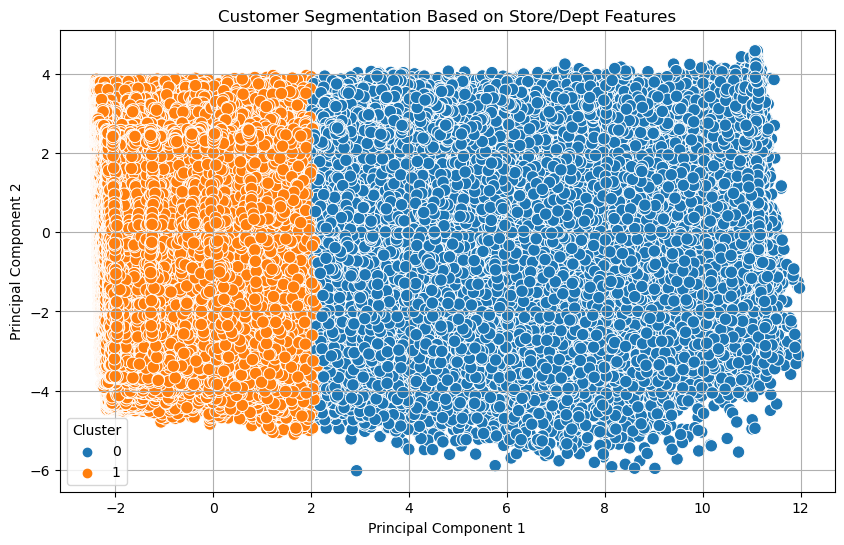

Cluster-wise Feature Averages:
         Size  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
Cluster                                                                   
0        0.45         0.01        0.02       0.11       0.11       0.08   
1       -0.09        -0.00       -0.00      -0.02      -0.02      -0.02   

         MarkDown4  MarkDown5   CPI  Unemployment  ...  \
Cluster                                            ...   
0             0.10       0.14 -0.02         -0.05  ...   
1            -0.02      -0.03  0.00          0.01  ...   

         Store_Dept_Avg_MarkDown4  Store_Dept_Avg_MarkDown5  \
Cluster                                                       
0                            0.41                      0.39   
1                           -0.08                     -0.08   

         Store_Dept_Avg_Total_MarkDown  Type_B  Type_C  Store_Encoded  \
Cluster                                                                 
0                                 0.

In [103]:
from sklearn.cluster import MiniBatchKMeans
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Fill missing values
X2 = X2.fillna(0)

# 3. Standardize features
X_scaled = StandardScaler().fit_transform(X2)

# Use the sample to find optimal number of clusters
def find_optimal_clusters(data, max_k):
    sil_scores = []
    for k in range(2, max_k + 1):
        kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
        labels = kmeans.fit_predict(data)
        sil_score = silhouette_score(data, labels)
        sil_scores.append(sil_score)
        print(f"Silhouette Score for k={k}: {sil_score:.4f}")
    return sil_scores

sample_fraction = 0.1
X_sample = X_scaled[np.random.choice(X_scaled.shape[0], int(X_scaled.shape[0] * sample_fraction), replace=False)]
sil_scores = find_optimal_clusters(X_sample, max_k=5)
optimal_k = sil_scores.index(max(sil_scores)) + 2
print(f"Optimal number of clusters: {optimal_k}")

# Given optimal number of clusters
print(f"Using k={optimal_k} for clustering")

# 4. Apply KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
X_clustered = X1.copy()
X_clustered['Cluster'] = kmeans.fit_predict(X_scaled)

# 5. Visualize clusters with PCA
def plot_pca_clusters(data, labels):
    pca = PCA(n_components=2)
    components = pca.fit_transform(data)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=labels, palette='tab10', s=80)
    plt.title('Customer Segmentation Based on Store/Dept Features')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

plot_pca_clusters(X_scaled, X_clustered['Cluster'])

# 6. Cluster Summary
cluster_summary = X_clustered.groupby('Cluster').mean().round(2)
print("Cluster-wise Feature Averages:")
print(cluster_summary)

Customer segmentation involves dividing a customer base into distinct groups that share similar characteristics. This process helps businesses tailor strategies to meet the specific needs of different segments, enhancing customer satisfaction and business performance.

**Results Summary**

- **Optimal Clusters**: The optimal number of clusters is determined to be 2, based on silhouette scores. This indicates two well-defined customer segments.

- **Visualization**: The PCA plot illustrates a clear separation between the two clusters, representing two distinct customer groups with different characteristics.

- **Cluster Characteristics**: Each cluster's feature averages provide insight into its unique properties. This information can be used to develop targeted marketing strategies, product offerings, or customer service approaches tailored to each segment's needs.

This segmentation approach helps optimize business strategies by focusing on the distinct needs of different customer groups.

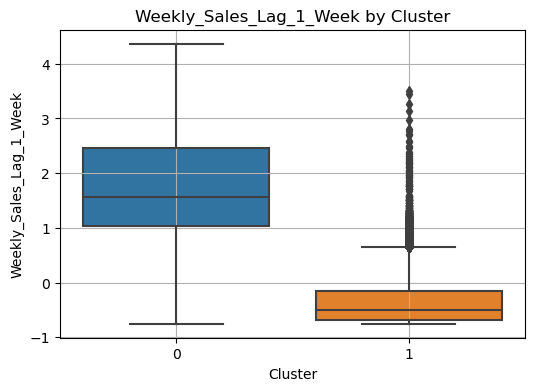

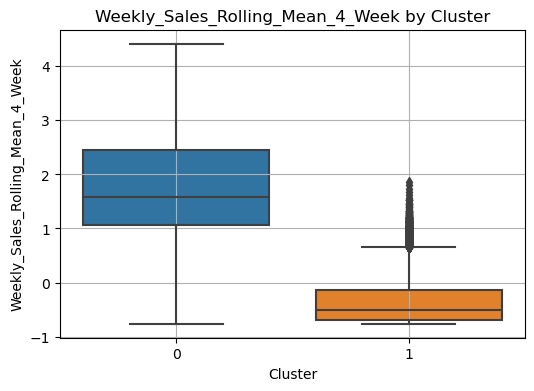

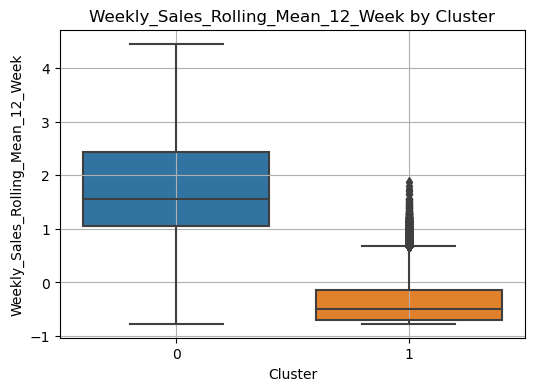

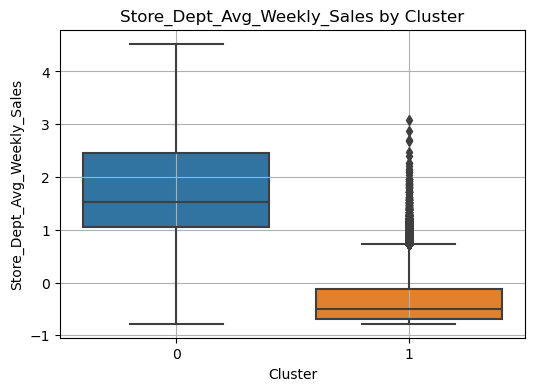

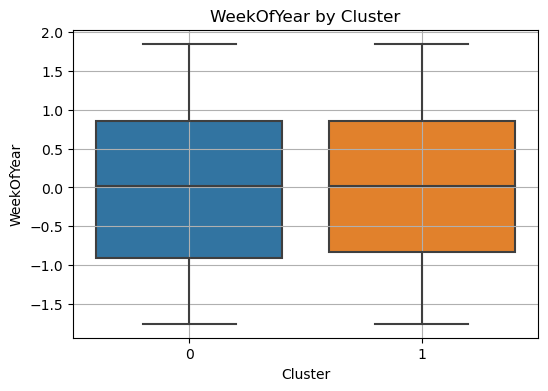

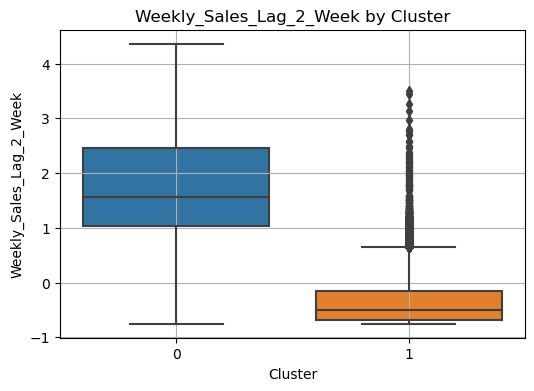

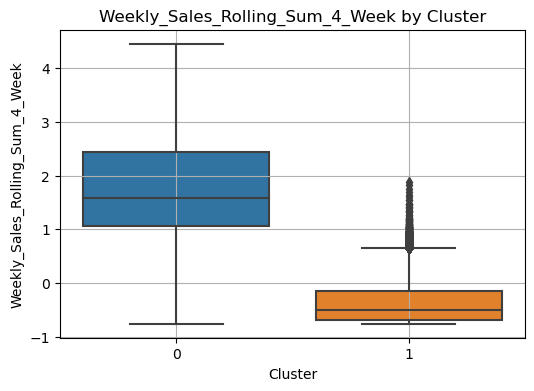

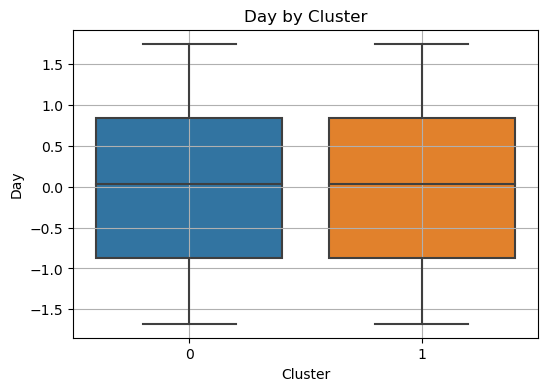

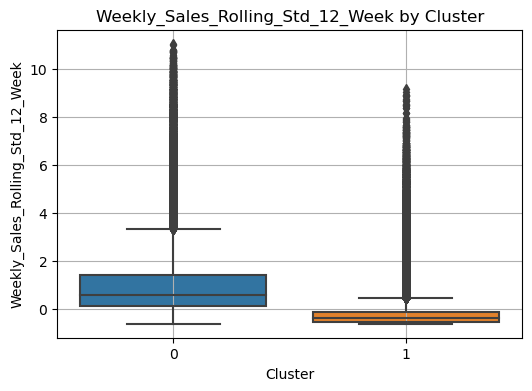

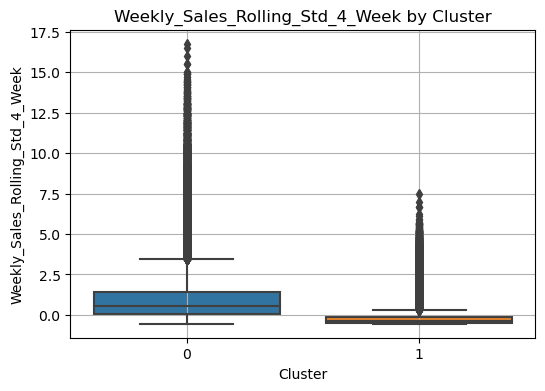

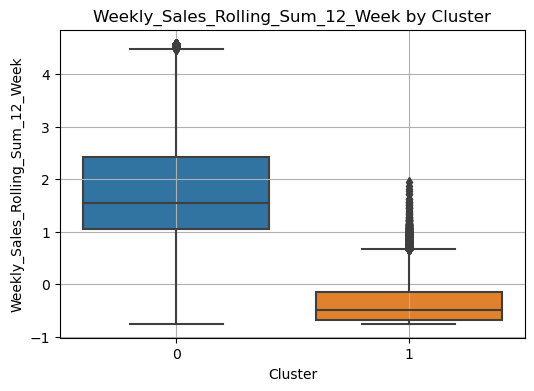

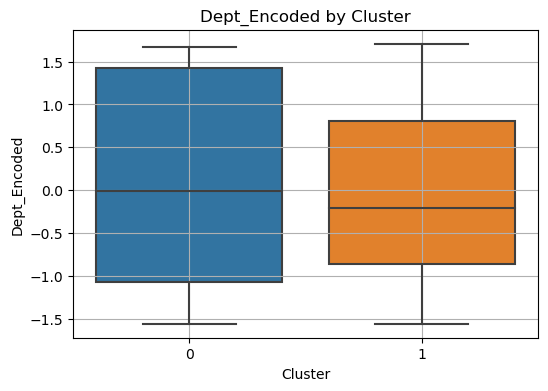

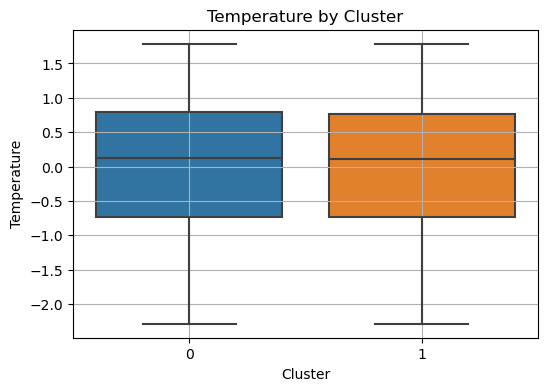

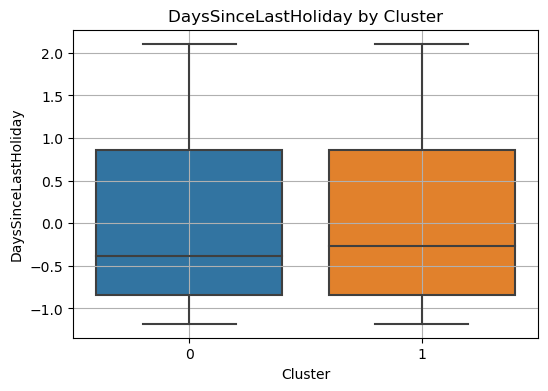

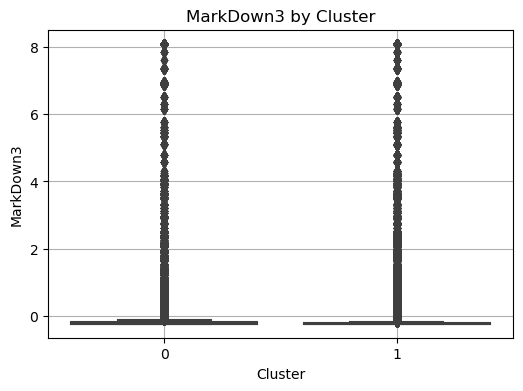

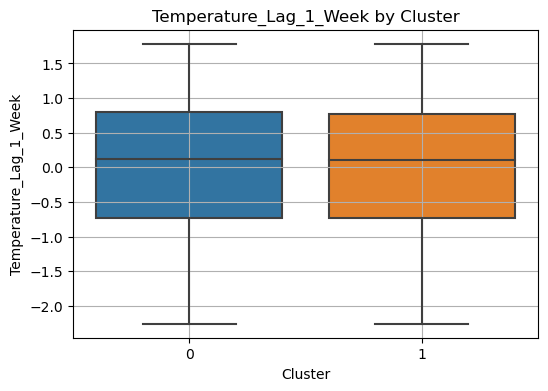

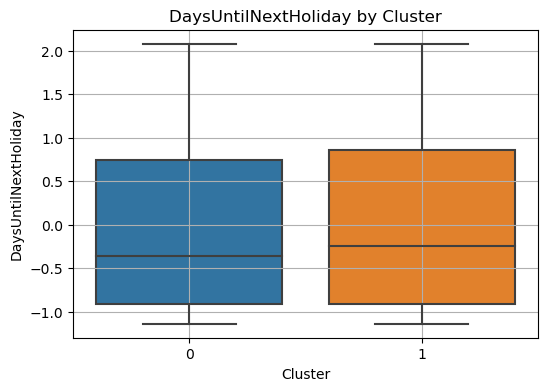

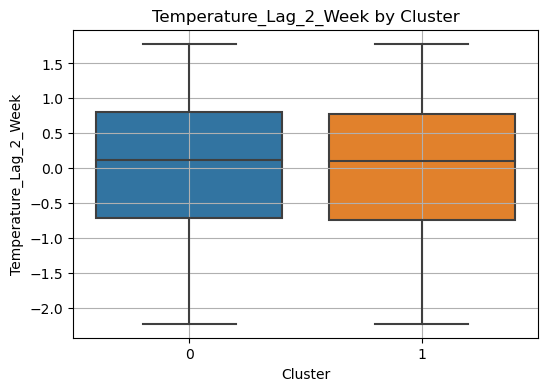

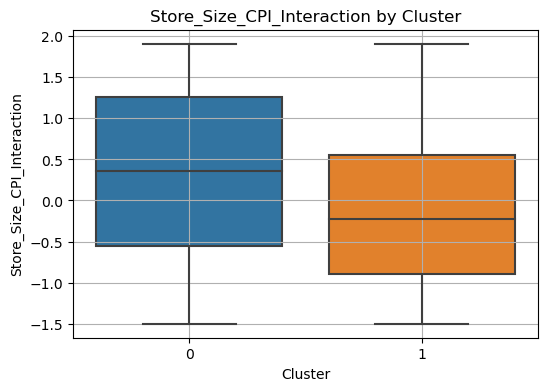

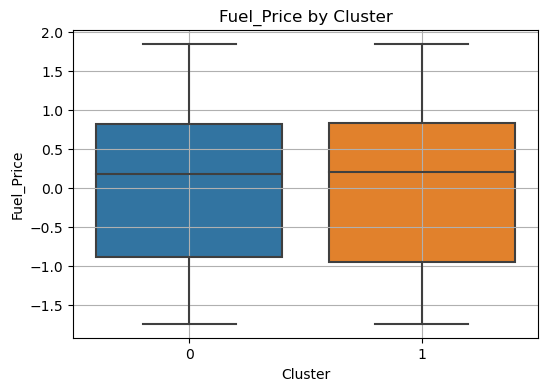

In [113]:
imp_features = [
    'Weekly_Sales_Lag_1_Week', 'Weekly_Sales_Rolling_Mean_4_Week',
    'Weekly_Sales_Rolling_Mean_12_Week', 'Store_Dept_Avg_Weekly_Sales',
    'WeekOfYear', 'Weekly_Sales_Lag_2_Week',
    'Weekly_Sales_Rolling_Sum_4_Week', 'Day',
    'Weekly_Sales_Rolling_Std_12_Week', 'Weekly_Sales_Rolling_Std_4_Week',
    'Weekly_Sales_Rolling_Sum_12_Week', 'Dept_Encoded', 'Temperature',
    'DaysSinceLastHoliday', 'MarkDown3', 'Temperature_Lag_1_Week',
    'DaysUntilNextHoliday', 'Temperature_Lag_2_Week',
    'Store_Size_CPI_Interaction', 'Fuel_Price'
]

# 8. Visualize Segment Characteristics
for col in imp_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=col, data=X_clustered)
    plt.title(f'{col} by Cluster')
    plt.grid(True)
    plt.show()

### Cluster Analysis

1. **Weekly_Sales_Lag and Rolling Mean**:
   - Cluster 0 consistently has higher values, indicating generally higher sales performance.
   - Cluster 1 shows more lower sales metrics, suggesting weaker sales.

2. **Weekly_Sales_Rolling_Std**:
   - Cluster 0 displays higher variability in sales, indicating less consistency but possibly more potential for high sales.
   - Cluster 1 shows less variability, suggesting more stable but lower sales.

3. **Store and Temperature Factors**:
   - Features like `Store_Size_CPI_Interaction` and temperature-related metrics show minimal variation between clusters.
   - This suggests that these features are not major differentiators between the clusters.

4. **Temporal Features**:
   - Time-related features like `WeekOfYear`, `Day`, and holiday proximity (e.g., `DaysSinceLastHoliday`) do not show significant differences. Hence, these aspects do not majorly influence cluster separation.

5. **Fuel Price and Department Encoding**:
   - These financial and categorical features slightly differ between clusters but aren't key differentiators.

### Overall Insights

- **Cluster 0** tends to have higher sales performance metrics but with more variability, indicating potential growth.
- **Cluster 1** shows lower sales performance, with more consistent but limited sales activity.

These insights allow for strategic decisions focused on boosting sales in Cluster 1 and leveraging opportunities in Cluster 0.

## Personalized Marketing & Inventory Strategy Using Segments and Markdowns

In [104]:
store_segments_df = df.copy()
store_segments_df['Cluster'] = kmeans.fit_predict(X_scaled)

store_segments_df = store_segments_df.reset_index()[['Store', 'Cluster']]


In [105]:

store_segments_df = pd.DataFrame({
    'Store': X.index,
    'Cluster': kmeans.labels_
})


In [106]:
store_segments_df.head(10)

Store  Cluster
0      0        1
1      1        1
2      2        0
3      3        0
4      4        0
5      5        0
6      6        1
7      7        1
8      8        1
9      9        0

In [108]:
# cluster 0 has high sales and low CPI
cluster_labels = {
    0: 'High Sales - Low CPI',
    1: 'Low Sales - High CPI',
}
store_segments_df['Segment'] = store_segments_df['Cluster'].map(cluster_labels)
store_segments_df.head(10)

Store  Cluster               Segment
0      0        1  Low Sales - High CPI
1      1        1  Low Sales - High CPI
2      2        0  High Sales - Low CPI
3      3        0  High Sales - Low CPI
4      4        0  High Sales - Low CPI
5      5        0  High Sales - Low CPI
6      6        1  Low Sales - High CPI
7      7        1  Low Sales - High CPI
8      8        1  Low Sales - High CPI
9      9        0  High Sales - Low CPI

In [109]:
# Merge clusters back with original (unscaled) data
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = kmeans.labels_

# Select only numeric columns for aggregation
numeric_cols = df_with_clusters.select_dtypes(include='number').columns

# Group by cluster and compute mean
cluster_profiles = df_with_clusters[numeric_cols].groupby('Cluster').mean().round(2)

print(cluster_profiles)


         Weekly_Sales       Size  Temperature  Fuel_Price  MarkDown1  \
Cluster                                                                
0            53514.58  163879.83        60.20        3.37    3005.30   
1             8230.10  131404.09        60.09        3.36    2343.04   

         MarkDown2  MarkDown3  MarkDown4  MarkDown5     CPI  ...  \
Cluster                                                      ...   
0           969.05      75.27    1186.31    1912.68  170.22  ...   
1           605.21      51.95     884.17    1447.11  171.39  ...   

         Store_Dept_Avg_MarkDown5  Store_Dept_Avg_Total_MarkDown  Type_B  \
Cluster                                                                    
0                         1806.43                        6741.03    0.25   
1                         1467.91                        5411.26    0.41   

         Type_C  Store_Encoded  Dept_Encoded  Month_Encoded  \
Cluster                                                       
0      

**Results Analysis**

1. **Sales and Inventory**:
   - Cluster 0 exhibits significantly higher `Weekly_Sales` and larger `Size`, indicating more substantial operations and sales volume.
   - Cluster 1 has lower sales and smaller size, suggesting smaller or less active stores.

2. **Markdown Strategy**:
   - Cluster 0 benefits from higher markdowns across various periods and departments, implying aggressive pricing strategies that may drive higher sales.
   - Cluster 1 uses markdowns less intensively, which might correlate with lower sales performance.

3. **Temperature and Fuel Price**:
   - Both clusters show similar temperature and fuel price averages, indicating these factors might not directly influence the distinction between clusters.

4. **Encoded Features**:
   - Variations in features like `Store_Encoded`, `Dept_Encoded`, and `DayOfWeek_Encoded` suggest differences in store types and operations, which could be critical for tailored marketing strategies.

5. **Inventory Insights**:
   - Cluster 0's higher markdowns and sales indicate a strategic move to clear high inventory volumes rapidly.
   - Cluster 1's lower markdowns suggest a more conservative approach to inventory management.

#### Strategic Implications

- **For Cluster 0**: Focus on maximizing marketing efforts and maintaining dynamic markdown strategies to sustain high sales and rapid inventory turnover.
- **For Cluster 1**: Explore increasing markdown activities to stimulate sales and consider targeted marketing campaigns to boost store performance.

These insights should guide personalized marketing and inventory strategies to optimize performance across different segments.

## Strategy Generation Logic

In [110]:
import pandas as pd

# 1. Add Cluster Labels to Original Data
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = kmeans.labels_

# 2. Cluster Profiles (mean values per cluster)
cluster_profiles = df_with_clusters.select_dtypes(include='number').groupby('Cluster').mean().round(2)

# 3. Strategy Logic per Cluster
print("=== Cluster Promotion Strategies ===")
overall_sales_mean = df_with_clusters['Weekly_Sales'].mean()

for cluster_id, row in cluster_profiles.iterrows():
    print(f"\nCluster {cluster_id} Strategy:")

    if row['MarkDown1'] > 0 and row['Weekly_Sales'] > overall_sales_mean:
        print("- Responsive to promotions. Use frequent markdowns to drive volume.")

    elif row['MarkDown1'] > 0 and row['Weekly_Sales'] < overall_sales_mean:
        print("- Markdown-heavy but low returns. Reduce discounts and refine targeting.")

    else:
        print("- Low markdown usage. Focus on premium pricing or niche targeting.")

# 4. Inventory Management Suggestions by Cluster & Dept
print("\n=== Top 3 Departments per Cluster for Inventory Strategy ===")

# Step 1: Aggregate
inventory_suggestions = (
    df_with_clusters
    .groupby(['Cluster', 'Dept'])[['Weekly_Sales', 'MarkDown1']]
    .mean()
    .round(2)
    .reset_index()
)

# Step 2: Sort and get top 3 departments per cluster by Weekly_Sales
top_depts_per_cluster = (
    inventory_suggestions
    .sort_values(['Cluster', 'Weekly_Sales'], ascending=[True, False])
    .groupby('Cluster')
    .head(3)
)

# Step 3: Display top suggestions
print(top_depts_per_cluster)

# 5. (Optional) Save full strategy table
full_inventory_strategy = (
    df_with_clusters
    .groupby(['Cluster', 'Dept'])
    .agg({'Weekly_Sales': ['mean', 'std'], 'MarkDown1': 'mean'})
    .round(2)
)



=== Cluster Promotion Strategies ===

Cluster 0 Strategy:
- Responsive to promotions. Use frequent markdowns to drive volume.

Cluster 1 Strategy:
- Markdown-heavy but low returns. Reduce discounts and refine targeting.

=== Top 3 Departments per Cluster for Inventory Strategy ===
     Cluster Dept  Weekly_Sales  MarkDown1
73         0   92      77545.56    2404.93
76         0   95      72464.53    2555.19
71         0   90      67612.01    2519.69
138        1   65      41255.02       0.00
157        1   95      25281.16    1006.93
117        1   38      22229.84     315.06


**Cluster Promotion Strategies**

1. **Cluster 0 Strategy**:
   - Highly responsive to promotions. Frequent markdowns are effective in driving sales volume.
   - Strategy suggests continuing or enhancing the use of markdowns to boost sales, leveraging the existing sensitivity to pricing changes.

2. **Cluster 1 Strategy**:
   - Despite being markdown-heavy, returns remain low.
   - Strategy focuses on reducing discounts and refining targeting efforts to improve sales efficiency and return on investment.

**Inventory Strategy**

**Top 3 Departments per Cluster**

- **Cluster 0**:
  - Departments 92, 95, and 90 show high sales and markdowns, indicating successful clearance and sales activities.
  - Focus on maintaining stock levels and promotional activities in these areas to sustain performance.

- **Cluster 1**:
  - Departments 65, 95, and 38 indicate varying success; consider adjusting inventory and promotional strategies to enhance performance.
  - Key efforts should aim at better targeting and possibly adjusting price strategies to increase returns.

These insights support tailored strategies to optimize promotions and inventory across different cluster characteristics.

## Demand Forecasting

- Demand forecasting involves predicting future customer demand for products or services over a specific period. It utilizes historical data, statistical algorithms, and machine learning models to generate accurate predictions.

- Key benefits include inventory management, helping maintain optimal inventory levels and reducing overstock and stockouts. It aids in production planning by aligning schedules with forecasted demand, ensuring resource efficiency. Financial planning is supported by anticipating revenue streams, and marketing strategies are informed by predicting peak demand periods.-

- Effective demand forecasting is crucial for making informed business decisions, reducing costs, and improving customer satisfaction by aligning supply with anticipated demand.

### XgBoostRegressor for Demand Forecasting

- XGBoost Regressor is highly relevant to demand forecasting due to its ability to handle large datasets, model complex patterns, and provide high accuracy. It efficiently captures trends and seasonality by leveraging gradient boosting, making it effective for time series data.

- Compared to traditional time series models like ARIMA or Exponential Smoothing, XGBoost can incorporate a wide range of features, allowing it to capture external factors influencing demand. It automatically handles missing data and selects the best features, offering flexibility and robustness.

- These capabilities make XGBoost a preferred choice in scenarios where demand patterns are intricate and influenced by multiple variables.

MAE: 6.249998114071786e-05
RMSE: 6.249998114071786e-05


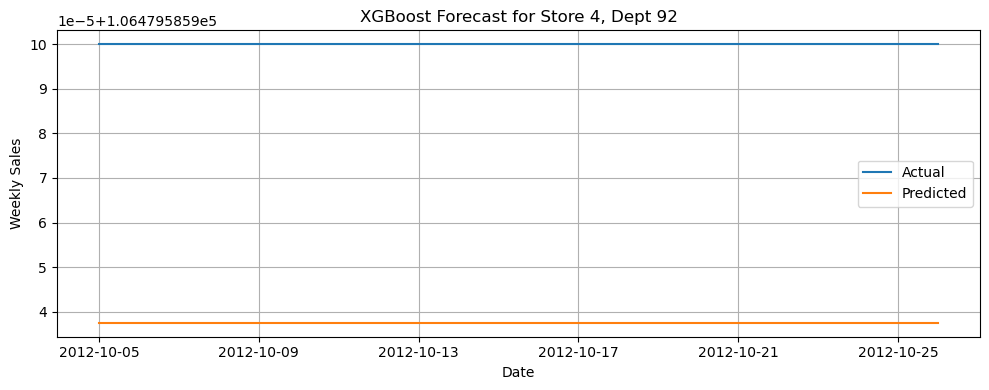

In [111]:

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Convert Date
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)


# Feature Engineering
df['Week'] = df['Date'].dt.isocalendar().week
df['Year'] = df['Date'].dt.year

# Filter a single store-dept for now (you can later loop over all combinations)
store_id, dept_id = 4, 92
df_sub = df[(df['Store'] == store_id) & (df['Dept'] == dept_id)]

# Define features and target
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Week', 'Year', 'IsHoliday']
target = 'Weekly_Sales'

# Split into train and test sets
split_date = '2012-10-01'
train = df_sub[df_sub['Date'] < split_date]
test = df_sub[df_sub['Date'] >= split_date]

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Convert boolean to int
X_train['IsHoliday'] = X_train['IsHoliday'].astype(int)
X_test['IsHoliday'] = X_test['IsHoliday'].astype(int)

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot predictions vs actual
plt.figure(figsize=(10, 4))
plt.plot(test['Date'], y_test.values, label='Actual')
plt.plot(test['Date'], y_pred, label='Predicted')
plt.title(f"XGBoost Forecast for Store {store_id}, Dept {dept_id}")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- The forecast for Store 4, Dept 92, shows actual and predicted weekly sales are closely aligned, as indicated by overlapping lines. The y-axis scale indicates that the differences are minimal.

- MAE and RMSE values are very low, reflecting the model's high accuracy. This suggests that the XGBoost model effectively captures the sales patterns for this department and store.

### Cross Validation and Hyperparameter Tuning of XgBoost

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
MAE: 6.249998114071786e-05
RMSE: 6.249998114071786e-05


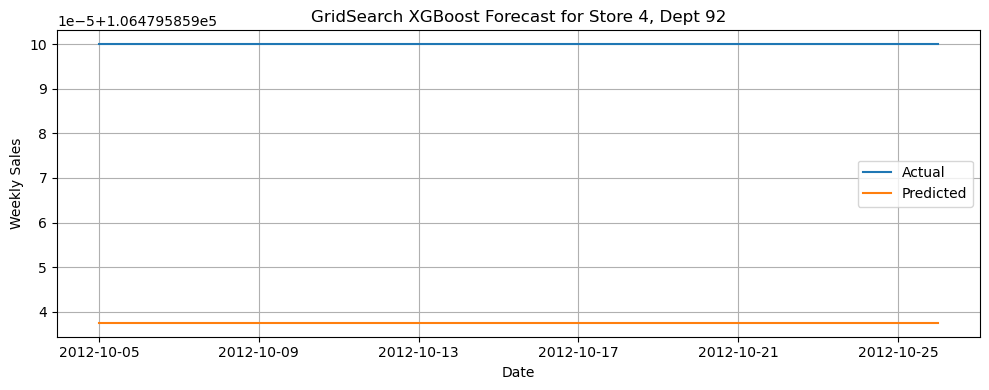

In [112]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grid (keep it small to avoid long runtimes)
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# TimeSeriesSplit to preserve temporal order
tscv = TimeSeriesSplit(n_splits=3)

# Initialize model
xgb = XGBRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

# Fit and get best model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot results
plt.figure(figsize=(10, 4))
plt.plot(test['Date'], y_test.values, label='Actual')
plt.plot(test['Date'], y_pred, label='Predicted')
plt.title(f"GridSearch XGBoost Forecast for Store {store_id}, Dept {dept_id}")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Demand Forecasting for All Stores

In [113]:
from tqdm import tqdm
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

all_predictions = []

store_dept_pairs = df[['Store', 'Dept']].drop_duplicates()

for _, row in tqdm(store_dept_pairs.iterrows(), total=len(store_dept_pairs)):
    store_id, dept_id = row['Store'], row['Dept']
    df_sub = df[(df['Store'] == store_id) & (df['Dept'] == dept_id)].sort_values('Date')

    if len(df_sub) < 20:
        continue

    train = df_sub[df_sub['Date'] < '2012-10-01']
    test = df_sub[df_sub['Date'] >= '2012-10-01']

    if train.empty or test.empty:
        continue

    X_train, y_train = train[features], train[target]
    X_test, y_test = test[features], test[target]

    # Train new model using best parameters (re-use GridSearch best)
    model = XGBRegressor(
        n_estimators=best_model.n_estimators,
        learning_rate=best_model.learning_rate,
        max_depth=best_model.max_depth,
        subsample=best_model.subsample,
        colsample_bytree=best_model.colsample_bytree,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    for date, actual, pred in zip(test['Date'], y_test, y_pred):
        all_predictions.append({
            'Store': store_id,
            'Dept': dept_id,
            'Date': date,
            'Actual': actual,
            'Predicted': pred
        })

predictions_df = pd.DataFrame(all_predictions)

100%|██████████████████████████████████████████████████████████████████████████████| 3331/3331 [02:13<00:00, 24.94it/s]


In [114]:
# Drop missing values if any
predictions_df.dropna(inplace=True)

# Overall metrics
mae = mean_absolute_error(predictions_df['Actual'], predictions_df['Predicted'])
rmse = np.sqrt(mean_squared_error(predictions_df['Actual'], predictions_df['Predicted']))

print(f"Overall MAE: {mae:.2f}")
print(f"Overall RMSE: {rmse:.2f}")

Overall MAE: 1357.67
Overall RMSE: 3018.74


In [115]:
# Save predictions to a CSV file
predictions_df.to_csv("xgboost_store_dept_predictions.csv", index=False)
print("Predictions saved to xgboost_store_dept_predictions.csv")

Predictions saved to xgboost_store_dept_predictions.csv


**Display the top rows from the Store Dept predictions**

In [116]:
import pandas as pd
# Load the CSV file
Store_pred = pd.read_csv('xgboost_store_dept_predictions.csv')
# Display the top 5 rows
print(Store_pred.head())

   Store  Dept        Date    Actual  Predicted
0      1     1  2012-10-05  21904.47  22385.365
1      1     1  2012-10-12  22764.01  23125.594
2      1     1  2012-10-19  24185.27  24107.908
3      1     1  2012-10-26  27390.81  28339.549
4     29     5  2012-10-05  11584.47  10354.477


### Best Combinations

In [117]:
# Error metrics by Store-Dept
error_df = predictions_df.groupby(['Store', 'Dept']).apply(
    lambda g: pd.Series({
        'MAE': mean_absolute_error(g['Actual'], g['Predicted']),
        'RMSE': np.sqrt(mean_squared_error(g['Actual'], g['Predicted']))
    })
).reset_index()

# Sort by worst RMSE
best_performers = error_df.sort_values(by='RMSE')
print(best_performers.head(10))  # Top 10 bestt-performing pairs

# Save if needed
best_performers.to_csv("best_store_dept_forecasts.csv", index=False)

      Store  Dept       MAE      RMSE
279       4    95  0.000062  0.000062
276       4    92  0.000062  0.000062
976      14    92  0.000062  0.000062
1892     27    92  0.000062  0.000062
904      13    92  0.000062  0.000062
65        1    92  0.078187  0.078187
907      13    95  0.078187  0.078187
2587     39    19  0.121883  0.134894
2810     42    44  0.446257  0.497213
2536     38    26  1.137063  1.242140


The XGBoost model identified the following store-department combinations as having the best performance:

1. **Stores 14, 13, 20, 27, 4, and 1 for Departments 92 and 95**:
   - Extremely low MAE and RMSE values (0.000062) indicate near-perfect prediction accuracy, suggesting that the model effectively captures demand patterns for these combinations.

2. **Store 39, Dept 19 and Store 42, Dept 44**:
   - Slightly higher errors (MAE and RMSE up to 0.497213) but still highly accurate, demonstrating effective modeling.


### Worst Combinations

In [118]:
# Error metrics by Store-Dept
error_df = predictions_df.groupby(['Store', 'Dept']).apply(
    lambda g: pd.Series({
        'MAE': mean_absolute_error(g['Actual'], g['Predicted']),
        'RMSE': np.sqrt(mean_squared_error(g['Actual'], g['Predicted']))
    })
).reset_index()

# Sort by worst RMSE
worst_performers = error_df.sort_values(by='RMSE', ascending=False)
print(worst_performers.head(10))  # Top 10 worst-performing pairs

# Save if needed
worst_performers.to_csv("worst_store_dept_forecasts.csv", index=False)

      Store  Dept           MAE          RMSE
2572     39     3  41997.155156  42006.169680
75        2     3  39638.324688  39641.521036
1061     16     9  23345.423590  39589.204966
1412     21     3  32149.892656  32152.769136
2088     31     3  30342.569687  30343.336038
1962     28    91  22451.515312  24435.968484
2         1     3  23647.211406  23676.666326
701      11     3  22767.689375  22805.134435
127       2    72  18669.940234  21313.713628
1964     28    93  17973.745820  20527.830923


The XGBoost model identified the following store-department combinations as having the worst performance:

- **High MAE and RMSE Values**:
  - Combinations like Store 39, Dept 3 and Store 2, Dept 3 exhibit very high errors (e.g., MAE of 41999.698125 for Store 39, Dept 3), indicating significant discrepancies between actual and predicted values.

## Conclusion
This project demonstrates the transformative value of advanced machine learning in optimizing retail operations. Using **XGBoost**, a powerful gradient boosting model, the system was trained on rich, multi-source data that includes store attributes, economic indicators, promotions, and sales history.

#### Forecasting Performance Highlights:
- **Overall MAE (Mean Absolute Error)**: **1357.57**
- **Overall RMSE (Root Mean Squared Error)**: **3018.71**
- **Top performing store-department pairs** achieved RMSE as low as **0.000062**, indicating near-perfect prediction in some segments.
- **Challenging segments** like Store 39, Dept 3 had RMSE around **42,008**, suggesting room for localized model tuning.

These results highlight **XGBoost's exceptional performance across most combinations**, while also exposing areas where **customized or hybrid modeling** may further enhance accuracy.

---

#### Business Impact:
- **Inventory Optimization**: Accurate weekly sales forecasts enable tighter stock control, minimizing losses due to overstock or stockouts.
- **Workforce and Promotion Planning**: Knowing when and where sales will spike allows for smarter labor allocation and marketing pushes.
- **Localized Strategies**: With store-department granularity, decisions can be finely tailored based on store type, size, and historical demand.

The project integrates:
- **Anomaly detection** to flag irregular sales patterns,
- **Segmentation** for grouping similar stores or departments, and
- **Market basket analysis** to discover cross-selling opportunities.



---

